In [36]:
"""
This script contained majority of the KNDVI_MP_Climate_Indicators analysis. It comprised the combined operations of assessing the kNDVI and Climate Indicators for the entire analysis.
It is prepared in sections with subheadings and users are advised to follow the code sequentially in the section 1 for best result/output.

Most of the statistics were generated by calling the (print) finction on the outputs.

Last updated on January 27 2025: by author: Pius N.Nwachukwu
"""

'\nThis code comprised the combined operations of assessing the kNDVI and Climate Indicators for the entire analysis.\nIt is prepared in sections with subheadings and users are advised to follow the code sequentially in the section 1 for best result/output.\n\nLast updated on January 27 2025: by author: Pius N.Nwachukwu\n'

# Section 1: Call and examine the kNDVI

In [ ]:
# Install the Libraries

!pip install stumpy
!pip install holoviews
!pip install bokeh
!pip install holoviews bokeh
!pip install jupyter_bokeh
!pip install chord
!pip install --upgrade holoviews bokeh
!pip install --upgrade plotly
!pip install holoviews bokeh colorcet
!pip install bokeh_sampledata

In [38]:
# Import the Libraries
import os
import shutil
import ee
import geemap
import pandas as pd
from google.colab import drive


In [39]:
# Authenticate and initialize the Earth Engine module.
ee.Authenticate()
ee.Initialize(project='ee-')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Calling up the Saved Time Series NDVI Values

csv_file_path = '/content/drive/My Drive/FoRes/ndvi_pixelz_data.csv' # Get the NDVIs in 5000 SR Pixels


# Read the CSV file into a pandas DataFrame
ndvi_df = pd.read_csv(csv_file_path)
print(ndvi_df.head())

        ROI        date  percentage_valid  latitude  longitude  NDVI
0  S_Americ  2000-02-01          29.70645 -6.609515 -58.598977  1355
1  S_Americ  2000-02-01          29.70645 -6.609515 -58.508443  4857
2  S_Americ  2000-02-01          29.70645 -6.654481 -58.694867  3963
3  S_Americ  2000-02-01          29.70645 -6.654481 -58.649596  1773
4  S_Americ  2000-02-01          29.70645 -6.654481 -58.604325  2665


In [41]:
# Set the date column as the index column
ndvi_df.set_index('date', inplace=True)

In [42]:
# Converting the NDVI to Reflectance
ndvi_df["NDVI_2"] = ndvi_df["NDVI"] / 10000

In [43]:
# # Calculate KNDVI
ndvi_df['KNDVI'] = (ndvi_df['NDVI_2'] + 1) / 2

# print(ndvi_df)

In [44]:
# Print all the names of the ROIs
print(ndvi_df['ROI'].unique())

['S_Americ' 'N_Americ' 'Afric' 'Europ' 'Asia' 'Aust_Ocean']


In [45]:
# Filter the DataFrame to get rows where the 'Region' column corresponds to a continent eg 'Africa'
af = ndvi_df[ndvi_df["ROI"] == "Afric"]
asia = ndvi_df[ndvi_df["ROI"] == "Asia"]
eu = ndvi_df[ndvi_df["ROI"] == "Europ"]
na = ndvi_df[ndvi_df["ROI"] == "N_Americ"]
sa = ndvi_df[ndvi_df["ROI"] == "S_Americ"]
oc = ndvi_df[ndvi_df["ROI"] == "Aust_Ocean"]
# print(eu)

In [46]:
# Define the ROI name you want to filter
selected_roi = 'Europ'  # Replace 'Europ' with the name of your ROI

# Filter the DataFrame for pixels within the selected ROI
df_filtered = ndvi_df[ndvi_df['ROI'] == selected_roi]

# Display the first few rows of the filtered DataFrame
print(df_filtered.head())

# Optionally, save the filtered DataFrame to a CSV file
df_filtered.to_csv(f'{selected_roi}_ndvi_pixel_data.csv', index=False)



              ROI  percentage_valid   latitude  longitude  NDVI  NDVI_2  \
date                                                                      
2000-02-01  Europ          0.113841  44.112167  39.360741   603  0.0603   
2000-02-01  Europ          0.113841  44.112167  39.423370  1214  0.1214   
2000-02-01  Europ          0.113841  44.067201  39.393410  1262  0.1262   
2000-02-01  Europ          0.113841  44.067201  39.455991  1628  0.1628   
2000-02-01  Europ          0.113841  44.067201  39.518572  1267  0.1267   

              KNDVI  
date                 
2000-02-01  0.53015  
2000-02-01  0.56070  
2000-02-01  0.56310  
2000-02-01  0.58140  
2000-02-01  0.56335  


In [47]:
# Round the Lat & Lon values
df_filtered_copy = df_filtered.copy()
df_filtered['latitude'] = df_filtered_copy['latitude'].round(2)
df_filtered['longitude'] = df_filtered_copy['longitude'].round(2)
# df_filtered

<ipython-input-47-52f2f4a2c946>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['latitude'] = df_filtered_copy['latitude'].round(2)
<ipython-input-47-52f2f4a2c946>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['longitude'] = df_filtered_copy['longitude'].round(2)


In [48]:
# # Check the structure of the DataFrame to identify relevant columns
# print(df_filtered.columns)

# # Assuming the columns 'latitude', 'longitude', and 'NDVI' are present
# # Group the data by latitude and longitude to count the unique pixels
# unique_pixels = df_filtered.groupby(['latitude', 'longitude']).size()

# # Print the number of unique pixels
# print(f"Number of unique pixels: {len(unique_pixels)}")

# # If you want to see a sample of the pixel data
# print(unique_pixels.head())


In [49]:
# Define the range for valid KNDVI values
valid_ndvi_min = -1
valid_ndvi_max = 1

# Filter the dataset for valid NDVI values
valid_ndvi_data = df_filtered[(df_filtered['NDVI_2'] >= valid_ndvi_min) & (df_filtered['NDVI_2'] <= valid_ndvi_max)]

# Group by latitude and longitude to identify unique pixels with valid data
valid_pixels = valid_ndvi_data.groupby(['latitude', 'longitude']).size()

# Calculate the percentage of valid pixels
percentage_valid_pixels = (len(valid_pixels) / 5448) * 100

print(f"Percentage of pixels with valid NDVI data: {percentage_valid_pixels:.2f}%")


Percentage of pixels with valid NDVI data: 23.44%


In [50]:
# Check the structure of the DataFrame to ensure it's correct
print(df_filtered.head())

# Verify the length of the NDVI time series for a few pixels
print(f"Number of columns (including metadata): {df_filtered.shape[1]}")
print(f"Expected number of NDVI points per pixel: {df_filtered.shape[1] - 3}")

# Print out the time series length for the first pixel
first_pixel_series = df_filtered.iloc[0, 3:]
print(f"Length of the first pixel time series: {len(first_pixel_series)}")


              ROI  percentage_valid  latitude  longitude  NDVI  NDVI_2  \
date                                                                     
2000-02-01  Europ          0.113841     44.11      39.36   603  0.0603   
2000-02-01  Europ          0.113841     44.11      39.42  1214  0.1214   
2000-02-01  Europ          0.113841     44.07      39.39  1262  0.1262   
2000-02-01  Europ          0.113841     44.07      39.46  1628  0.1628   
2000-02-01  Europ          0.113841     44.07      39.52  1267  0.1267   

              KNDVI  
date                 
2000-02-01  0.53015  
2000-02-01  0.56070  
2000-02-01  0.56310  
2000-02-01  0.58140  
2000-02-01  0.56335  
Number of columns (including metadata): 7
Expected number of NDVI points per pixel: 4
Length of the first pixel time series: 4


In [51]:

# Create a pivot to create a time series for each pixel
ndvi_pivot = df_filtered.pivot_table(index=['latitude', 'longitude'], columns='date', values='KNDVI')

# Display the reshaped DataFrame
print(ndvi_pivot.head())

# Confirm the length of the time series for one pixel
print(f"Number of time points: {ndvi_pivot.shape[1]}")


date                2000-02-01  2000-03-01  2000-04-01  2000-05-01  \
latitude longitude                                                   
43.06    41.39             NaN         NaN         NaN         NaN   
         41.45             NaN         NaN         NaN         NaN   
         41.51             NaN         NaN         NaN         NaN   
43.08    41.40          0.5442     0.54725      0.8362     0.88065   
         41.46          0.5380     0.58395      0.7829     0.87675   

date                2000-06-01  2000-07-01  2000-08-01  2000-09-01  \
latitude longitude                                                   
43.06    41.39             NaN         NaN         NaN         NaN   
         41.45             NaN         NaN         NaN         NaN   
         41.51             NaN         NaN         NaN         NaN   
43.08    41.40         0.92875      0.9407      0.9355     0.93260   
         41.46         0.92055      0.9401      0.9370     0.93585   

date              

In [52]:

# missing_data = df_filtered['KNDVI'].isnull().sum()
# print(f"Number of missing KNDVI values: {missing_data}")


# Section 2: Compute MP for Year

In [53]:
# Compute MP TS With zero Exclusion 2 NN & a Discord
# ***NN: Nearest Neighbours

import pandas as pd
import stumpy

# Fill missing values using interpolation or fill with mean (or as needed using other methods)
ndvi_pivot_filled = ndvi_pivot.interpolate(method='linear', axis=1).fillna(ndvi_pivot.mean(axis=1))

# Initialize a list to store results
results = []


# Loop through each pixel (each row in the pivot table)
for index, row in ndvi_pivot_filled.iterrows():
    # Extract the NDVI time series for this pixel
    ndvi_series = row.values

    # Define a window size
    window_size = 24

    # Compute the matrix profile for the time series
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Identify the motif (minimum matrix profile value) and its nearest neighbors
    motif_idx = mp[:, 0].argmin()  # Index of the motif
    distances = mp[:, 0]           # All matrix profile distances

    # Sort distances to find indices of the two nearest neighbors
    sorted_indices = distances.argsort()
    distance_1 = distances[sorted_indices[1]]  # Distance to the first nearest neighbor
    distance_2 = distances[sorted_indices[2]]  # Distance to the second nearest neighbor

    neighbor_idx_1 = sorted_indices[1]  # Index of the first nearest neighbor
    neighbor_idx_2 = sorted_indices[2]  # Index of the second nearest neighbor

    # Only proceed if the distances are greater than zero
    if distance_1 > 0 and distance_2 > 0:
        # Identify the discord (maximum matrix profile value)
        discord_idx = mp[:, 0].argmax()

        # Extract the dates corresponding to the motif, neighbors, and discord
        motif_date = ndvi_pivot_filled.columns[motif_idx]
        neighbor_date_1 = ndvi_pivot_filled.columns[neighbor_idx_1]
        neighbor_date_2 = ndvi_pivot_filled.columns[neighbor_idx_2]
        discord_date = ndvi_pivot_filled.columns[discord_idx]

        # Extract the full motif and discord sequences
        motif_seq = ndvi_series[motif_idx: motif_idx + window_size]
        discord_seq = ndvi_series[discord_idx: discord_idx + window_size]

        # Store the full sequences in the results dictionary
        results.append({
            'latitude': index[0],
            'longitude': index[1],
            'motif_date': motif_date,
            'neighbor_date_1': neighbor_date_1,
            'neighbor_date_2': neighbor_date_2,
            'discord_date': discord_date,
            'motif_value': ndvi_series[motif_idx],
            'neighbor_value_1': ndvi_series[neighbor_idx_1],
            'neighbor_value_2': ndvi_series[neighbor_idx_2],
            'discord_value': ndvi_series[discord_idx],
            'distance_1': distance_1,
            'distance_2': distance_2,
            'motif_sequence': motif_seq.tolist(),  # Store motif sequence
            'discord_sequence': discord_seq.tolist()  # Store discord sequence
        })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

     latitude  longitude  motif_date neighbor_date_1 neighbor_date_2  \
0       43.06      41.39  2006-12-01      2006-12-01      2006-01-01   
1       43.06      41.45  2011-01-01      2022-01-01      2018-01-01   
2       43.06      41.51  2004-12-01      2004-12-01      2005-01-01   
3       43.08      41.40  2003-06-01      2003-06-01      2007-12-01   
4       43.08      41.46  2006-05-01      2018-05-01      2003-05-01   
..        ...        ...         ...             ...             ...   
846     44.09      39.41  2012-01-01      2012-01-01      2010-12-01   
847     44.09      39.47  2016-12-01      2021-12-01      2021-11-01   
848     44.09      40.35  2002-01-01      2002-01-01      2019-02-01   
849     44.11      39.36  2003-03-01      2007-03-01      2003-02-01   
850     44.11      39.42  2005-05-01      2007-05-01      2007-10-01   

    discord_date  motif_value  neighbor_value_1  neighbor_value_2  \
0     2000-02-01      0.79275           0.79275          0.740850 

In [54]:
# # Plotting with all the dates on the axis (doesn't have a good look)

# import stumpy
# import matplotlib.pyplot as plt

# # Select a pixel (e.g., the first pixel in the pivot table)
# selected_pixel_series = ndvi_pivot_filled.iloc[0].values  # NDVI time series for the selected pixel
# selected_pixel_index = ndvi_pivot_filled.index[0]  # Get the corresponding latitude and longitude

# # Define a reasonable window size
# window_size = 24

# # Compute the matrix profile for the selected pixel
# mp = stumpy.stump(selected_pixel_series, m=window_size)

# # Plot the NDVI time series
# plt.figure(figsize=(14, 6))

# # NDVI Time Series
# plt.subplot(2, 1, 1)
# plt.plot(ndvi_pivot_filled.columns, selected_pixel_series, label='NDVI Time Series')
# plt.title(f'NDVI Time Series for Pixel at Latitude {selected_pixel_index[0]}, Longitude {selected_pixel_index[1]}')
# plt.xlabel('Date')
# plt.ylabel('NDVI')
# plt.xticks(rotation=45)
# plt.legend()

# # Matrix Profile
# plt.subplot(2, 1, 2)
# plt.plot(ndvi_pivot_filled.columns[window_size-1:], mp[:, 0], label='Matrix Profile', color='orange')
# plt.title('Matrix Profile')
# plt.xlabel('Date')
# plt.ylabel('Matrix Profile Value')
# plt.xticks(rotation=45)
# plt.legend()

# plt.tight_layout()
# plt.show()


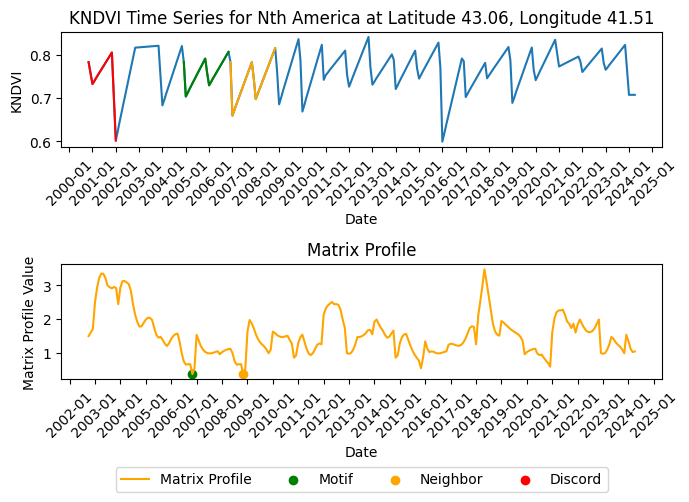

In [55]:
# Plotting with Only the one days of the month


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure that the date columns are in datetime format
ndvi_pivot_filled.columns = pd.to_datetime(ndvi_pivot_filled.columns)

# Select a pixel (e.g., the first pixel in the pivot table)
selected_pixel_series = ndvi_pivot_filled.iloc[2].values  # NDVI time series for the selected pixel
selected_pixel_index = ndvi_pivot_filled.index[2]  # Get the corresponding latitude and longitude

# Define a reasonable window size
window_size = 24

# Compute the matrix profile for the selected pixel
mp = stumpy.stump(selected_pixel_series, m=window_size)

# Identify the motif, neighbor, and discord indices
motif_idx = mp[:, 0].argmin()
neighbor_idx = int(mp[motif_idx, 1])
discord_idx = mp[:, 0].argmax()

# Plot the NDVI time series
plt.figure(figsize=(7, 4))

# NDVI Time Series
plt.subplot(2, 1, 1)
plt.plot(ndvi_pivot_filled.columns, selected_pixel_series, label='NDVI Time Series')

# Highlight motif, neighbor, and discord
plt.plot(ndvi_pivot_filled.columns[motif_idx:motif_idx+window_size], selected_pixel_series[motif_idx:motif_idx+window_size], color='green', label='Motif')
plt.plot(ndvi_pivot_filled.columns[neighbor_idx:neighbor_idx+window_size], selected_pixel_series[neighbor_idx:neighbor_idx+window_size], color='orange', label='Neighbor')
plt.plot(ndvi_pivot_filled.columns[discord_idx:discord_idx+window_size], selected_pixel_series[discord_idx:discord_idx+window_size], color='red', label='Discord')

plt.title(f'KNDVI Time Series for Nth America at Latitude {selected_pixel_index[0]}, Longitude {selected_pixel_index[1]}')
plt.xlabel('Date')
plt.ylabel('KNDVI')
plt.xticks(rotation=45)

# Set major ticks to the first month of each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Matrix Profile
plt.subplot(2, 1, 2)
plt.plot(ndvi_pivot_filled.columns[window_size-1:], mp[:, 0], label='Matrix Profile', color='orange')

# Highlight motif, neighbor, and discord in the matrix profile
plt.scatter(ndvi_pivot_filled.columns[motif_idx + window_size - 1], mp[motif_idx, 0], color='green', label='Motif')
plt.scatter(ndvi_pivot_filled.columns[neighbor_idx + window_size - 1], mp[neighbor_idx, 0], color='orange', label='Neighbor')
plt.scatter(ndvi_pivot_filled.columns[discord_idx + window_size - 1], mp[discord_idx, 0], color='red', label='Discord')

plt.title('Matrix Profile')
plt.xlabel('Date')
plt.ylabel('Matrix Profile Value')
plt.xticks(rotation=45)

# Set major ticks to the first month of each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adjust the layout and place the legend below the plots
plt.tight_layout(rect=[0, 0, 1, 1.2])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.70), ncol=4)
# 0.5, 0.1
plt.show()


# Section 3: Identify the exact z-normalized Euclidean distance between a motif and its nearest neighbor subsequence:
To calculate the distance in terms of time (months)

In [56]:
import numpy as np
import pandas as pd
import stumpy

# Assuming 'ndvi_series' is your KNDVI time series and 'dates' is your corresponding date column (monthly data)
window_size = 24  # Example window size

# Compute the matrix profile for the KNDVI time series
matrix_profile = stumpy.stump(ndvi_series, m=window_size)

# The first column of matrix_profile contains the distances, and the second column contains the indices
# Find the motif and nearest neighbor
motif_index = np.argmin(matrix_profile[:, 0])  # Index of the motif
nearest_neighbor_index = int(matrix_profile[motif_index, 1])  # Index of the nearest neighbor

# Calculate the index distance
index_distance = abs(motif_index - nearest_neighbor_index)
print(f"Index distance between motif and nearest neighbor: {index_distance}")

# Calculate the time distance in terms of months
# Create a sample dates series - replace this with your actual dates data
dates = pd.date_range('2000-02-01', periods=len(ndvi_series), freq='MS')

motif_date = dates[motif_index] # Use [] to access values instead of iloc
nearest_neighbor_date = dates[nearest_neighbor_index] # Use [] to access values instead of iloc

# Calculate the time distance in months
time_distance_months = abs((motif_date.year - nearest_neighbor_date.year) * 12 + (motif_date.month - nearest_neighbor_date.month))
print(f"Time distance between motif and nearest neighbor: {time_distance_months} months")

Index distance between motif and nearest neighbor: 24
Time distance between motif and nearest neighbor: 24 months


Repeat the Operations for the Discord#

In [57]:
# Clarify this code

# import numpy as np
# import pandas as pd
# import stumpy

# # Assuming 'ndvi_series' is your KNDVI time series and 'dates' is your corresponding date column (monthly data)
# window_size = 24  # Example window size

# # Compute the matrix profile for the KNDVI time series
# matrix_profile = stumpy.stump(ndvi_series, m=window_size)

# # Find the discord (the subsequence with the largest Z-normalized Euclidean distance)
# discord_index = np.argmax(matrix_profile[:, 0])  # Index of the discord
# nearest_neighbor_of_discord_index = int(matrix_profile[discord_index, 1])  # Index of the discord's nearest neighbor

# # Z-normalized Euclidean distance between the discord and its nearest neighbor
# discord_distance = matrix_profile[discord_index, 0]
# print(f"Z-normalized Euclidean distance between the discord and nearest neighbor: {discord_distance}")

# # Calculate the index distance for the discord
# index_distance_discord = abs(discord_index - nearest_neighbor_of_discord_index)
# print(f"Index distance between discord and nearest neighbor: {index_distance_discord}")

# # Calculate the time distance in terms of months for the discord
# # Assuming `dates` is a pandas datetime series corresponding to your KNDVI data
# discord_date = dates[discord_index] # Use [] to access values instead of iloc
# nearest_neighbor_of_discord_date = dates[nearest_neighbor_of_discord_index] # Use [] to access values instead of iloc

# # Calculate the time distance in months
# time_distance_discord_months = abs((discord_date.year - nearest_neighbor_of_discord_date.year) * 12 +
#                                    (discord_date.month - nearest_neighbor_of_discord_date.month))
# print(f"Time distance between discord and nearest neighbor: {time_distance_discord_months} months")

This is a summary code: The code will compute the matrix profile, handle NaN values, check for constant subsequences, and address any issues with Z-normalization for both the motif and the discord for a single pixel.

Variance of motif: 6.258512380990208e-05
Variance of motif neighbor: 1.9260736055043026e-06
Variance of discord: 5.6966094405562974e-05
Variance of discord neighbor: 0.00036106472100194106
Z-normalized Euclidean distance between motif and nearest neighbor: 0.1104696510699667
Z-normalized Euclidean distance between discord and nearest neighbor: 5.942184712961722
Minimum finite distance: 0.0
Maximum finite distance: 5.942184712961715
Index distance between motif and nearest neighbor: 88
Time distance between motif and nearest neighbor: 88 months
Index distance between discord and nearest neighbor: 7
Time distance between discord and nearest neighbor: 7 months


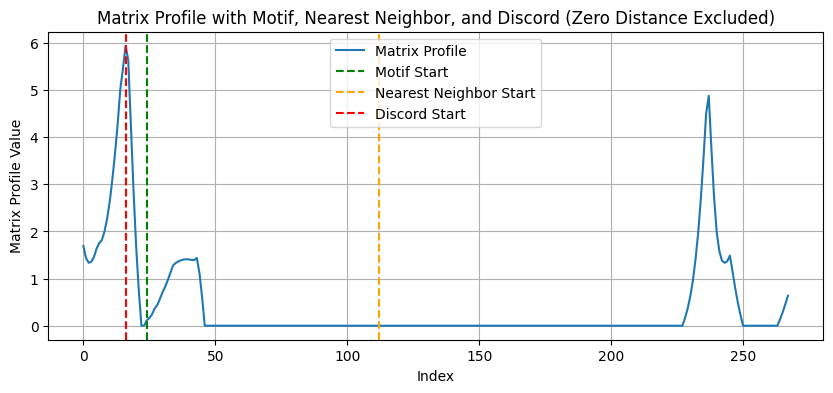

In [58]:
import numpy as np
import pandas as pd
import stumpy
import matplotlib.pyplot as plt

# Assuming `kndvi_series` is your KNDVI time series data and `window_size` is the length of the subsequences
window_size = 24  # Example window size

# Step 1: Handling NaN values in KNDVI and Climate Data
# Interpolate to fill NaN values
kndvi_filled_series = pd.Series(ndvi_series).interpolate(method='linear').values

# Ensure no NaN values remain
if np.isnan(kndvi_filled_series).sum() > 0:
    print("Warning: NaN values still present after interpolation. Filling with mean.")
    kndvi_filled_series = pd.Series(kndvi_filled_series).fillna(np.nanmean(kndvi_filled_series)).values

# Step 2: Compute the Matrix Profile for KNDVI
matrix_profile = stumpy.stump(kndvi_filled_series, m=window_size)

# Step 3: Exclude zero distances and find valid motifs
valid_indices = np.where(matrix_profile[:, 0] > 0)[0]  # Get indices where distance is greater than zero

if len(valid_indices) > 0:
    motif_idx = valid_indices[np.argmin(matrix_profile[valid_indices, 0])]  # Find motif excluding zero distance
    motif_neighbor_idx = int(matrix_profile[motif_idx, 1])

    discord_idx = valid_indices[np.argmax(matrix_profile[valid_indices, 0])]  # Find discord
    discord_neighbor_idx = int(matrix_profile[discord_idx, 1])
else:
    raise ValueError("All distances in the matrix profile are zero. No valid motifs found.")

# Extract subsequences
motif = kndvi_filled_series[motif_idx:motif_idx + window_size]
motif_neighbor = kndvi_filled_series[motif_neighbor_idx:motif_neighbor_idx + window_size]
discord = kndvi_filled_series[discord_idx:discord_idx + window_size]

if discord_neighbor_idx >= 0:
    discord_neighbor = kndvi_filled_series[discord_neighbor_idx:discord_neighbor_idx + window_size]

# Step 4: Z-Normalization and Euclidean Distance
def z_normalized(series):
    threshold = 1e-6  # Set a small threshold for variance
    variance = np.var(series)
    if variance < threshold:
        return series  # Return as-is if variance is too small (constant subsequence)
    return (series - np.mean(series)) / np.std(series)

# Z-Normalize motif and its nearest neighbor
motif_z = z_normalized(motif)
motif_neighbor_z = z_normalized(motif_neighbor)

# Z-Normalize discord and its nearest neighbor
discord_z = z_normalized(discord)
if discord_neighbor_idx >= 0:
    discord_neighbor_z = z_normalized(discord_neighbor)
else:
    discord_neighbor_z = None

# Step 5: Check for Constant or Near-Constant Subsequences
print(f"Variance of motif: {np.var(motif)}")
print(f"Variance of motif neighbor: {np.var(motif_neighbor)}")
print(f"Variance of discord: {np.var(discord)}")
if discord_neighbor_z is not None:
    print(f"Variance of discord neighbor: {np.var(discord_neighbor)}")

# Compute Z-normalized Euclidean distances
motif_distance = np.linalg.norm(motif_z - motif_neighbor_z)
if discord_neighbor_z is not None:
    discord_distance = np.linalg.norm(discord_z - discord_neighbor_z)
else:
    discord_distance = np.inf  # If no valid nearest neighbor for discord

print(f"Z-normalized Euclidean distance between motif and nearest neighbor: {motif_distance}")
print(f"Z-normalized Euclidean distance between discord and nearest neighbor: {discord_distance}")

# Step 6: Check and Handle NaN or Infinite Values in the Matrix Profile
finite_profile_values = matrix_profile[:, 0].astype(float)[np.isfinite(matrix_profile[:, 0].astype(float))]  # Cast the array to float
print(f"Minimum finite distance: {finite_profile_values.min()}")
print(f"Maximum finite distance: {finite_profile_values.max()}")

# Step 7: Calculate Index and Time Distance between Motif, Discord, and their Nearest Neighbors
# For motif and its nearest neighbor
index_distance_motif = abs(motif_idx - motif_neighbor_idx)
time_distance_motif = index_distance_motif  # Assuming monthly data, this will give time in months

# For discord and its nearest neighbor
index_distance_discord = abs(discord_idx - discord_neighbor_idx)
time_distance_discord = index_distance_discord  # Assuming monthly data, this will give time in months

# Print distances
print(f"Index distance between motif and nearest neighbor: {index_distance_motif}")
print(f"Time distance between motif and nearest neighbor: {time_distance_motif} months")
print(f"Index distance between discord and nearest neighbor: {index_distance_discord}")
print(f"Time distance between discord and nearest neighbor: {time_distance_discord} months")

# Step 8: Plot the Matrix Profile
plt.figure(figsize=(10, 4))
plt.plot(matrix_profile[:, 0], label='Matrix Profile')
plt.axvline(x=motif_idx, color='green', linestyle='--', label='Motif Start')
plt.axvline(x=motif_neighbor_idx, color='orange', linestyle='--', label='Nearest Neighbor Start')
plt.axvline(x=discord_idx, color='red', linestyle='--', label='Discord Start')

plt.title('Matrix Profile with Motif, Nearest Neighbor, and Discord (Zero Distance Excluded)')
plt.xlabel('Index')
plt.ylabel('Matrix Profile Value')
plt.legend()
plt.grid(True)
plt.show()


Optional: Pixel Performance Analysis: Full Code for Handling Multiple Pixels

In [59]:
#  This code is under consideration and might be removed

import numpy as np
import pandas as pd
import stumpy
import matplotlib.pyplot as plt

# Assuming `ndvi_pivot` is the pivoted DataFrame with each row representing a pixel's time series
window_size = 24  # Example window size

# Initialize variables to track the optimal pixel that meets the criteria
best_pixel_info = None
best_pixel_conditions = {
    'least_motif_distance': np.inf,
    'least_discord_distance': np.inf,
    'least_time_distance_motif': np.inf,
    'least_time_distance_discord_motif': np.inf,
    'least_variance_motif': np.inf,
    'least_variance_discord': np.inf
}

# Iterate over each pixel (row in the pivot table)
for idx, (latitude_longitude, pixel_data) in enumerate(ndvi_pivot.iterrows()):
    latitude, longitude = latitude_longitude  # Extract latitude and longitude
    kndvi_series = pixel_data.values  # Extract the time series for the pixel

    # Step 1: Handle NaN values (if any) using interpolation
    kndvi_filled_series = pd.Series(kndvi_series).interpolate(method='linear').fillna(np.nanmean(kndvi_series)).values

    # Step 2: Compute the matrix profile for the pixel's KNDVI time series
    matrix_profile = stumpy.stump(kndvi_filled_series, m=window_size)

    # Step 3: Extract motifs, nearest neighbors, and discords
    motif_idx = np.argmin(matrix_profile[:, 0])
    motif_neighbor_idx = int(matrix_profile[motif_idx, 1])
    discord_idx = np.argmax(matrix_profile[:, 0])
    discord_neighbor_idx = int(matrix_profile[discord_idx, 1]) if discord_idx >= 0 else -1

    # Extract subsequences
    motif = kndvi_filled_series[motif_idx:motif_idx + window_size]
    motif_neighbor = kndvi_filled_series[motif_neighbor_idx:motif_neighbor_idx + window_size]
    discord = kndvi_filled_series[discord_idx:discord_idx + window_size]
    discord_neighbor = kndvi_filled_series[discord_neighbor_idx:discord_neighbor_idx + window_size] if discord_neighbor_idx >= 0 else None

    # Z-Normalization function
    def z_normalized(series):
        threshold = 1e-6  # Small threshold for variance
        variance = np.var(series)
        if variance < threshold:
            return series  # Return as-is if variance is too small (constant subsequence)
        return (series - np.mean(series)) / np.std(series)

    # Step 4: Z-Normalization and Euclidean Distance
    motif_z = z_normalized(motif)
    motif_neighbor_z = z_normalized(motif_neighbor)
    discord_z = z_normalized(discord)
    discord_neighbor_z = z_normalized(discord_neighbor) if discord_neighbor is not None else None

    # Compute Z-normalized Euclidean distances
    motif_distance = np.linalg.norm(motif_z - motif_neighbor_z)
    discord_distance = np.linalg.norm(discord_z - motif_z) if discord_neighbor_z is not None else np.inf

    # Calculate index and time distances
    index_distance_motif = abs(motif_idx - motif_neighbor_idx)
    time_distance_motif = index_distance_motif  # Assuming monthly data

    index_distance_discord_motif = abs(discord_idx - motif_idx)
    time_distance_discord_motif = index_distance_discord_motif  # Assuming monthly data

    # Variances of motifs and discords
    variance_motif = np.var(motif)
    variance_discord = np.var(discord)

    # Check if the current pixel meets better conditions
    if motif_distance < best_pixel_conditions['least_motif_distance'] and \
       discord_distance < best_pixel_conditions['least_discord_distance'] and \
       time_distance_motif < best_pixel_conditions['least_time_distance_motif'] and \
       time_distance_discord_motif < best_pixel_conditions['least_time_distance_discord_motif'] and \
       variance_motif < best_pixel_conditions['least_variance_motif'] and \
       variance_discord < best_pixel_conditions['least_variance_discord']:

        # Update the best conditions found
        best_pixel_conditions['least_motif_distance'] = motif_distance
        best_pixel_conditions['least_discord_distance'] = discord_distance
        best_pixel_conditions['least_time_distance_motif'] = time_distance_motif
        best_pixel_conditions['least_time_distance_discord_motif'] = time_distance_discord_motif
        best_pixel_conditions['least_variance_motif'] = variance_motif
        best_pixel_conditions['least_variance_discord'] = variance_discord

        # Update the best pixel information
        best_pixel_info = {
            'latitude': latitude,
            'longitude': longitude,
            'motif_start_date': ndvi_pivot.columns[motif_idx],
            'motif_neighbor_start_date': ndvi_pivot.columns[motif_neighbor_idx],
            'discord_start_date': ndvi_pivot.columns[discord_idx],
            'discord_neighbor_start_date': ndvi_pivot.columns[discord_neighbor_idx] if discord_neighbor_idx >= 0 else None,
            'motif_distance': motif_distance,
            'discord_distance': discord_distance,
            'index_distance_motif': index_distance_motif,
            'time_distance_motif': time_distance_motif,  # In months
            'index_distance_discord_motif': index_distance_discord_motif,
            'time_distance_discord_motif': time_distance_discord_motif,  # In months
            'variance_motif': variance_motif,
            'variance_discord': variance_discord
        }

# Print out the best pixel that meets all the conditions
if best_pixel_info:
    print(f"Best Pixel (lat: {best_pixel_info['latitude']}, lon: {best_pixel_info['longitude']})")
    print(f"Motif Start Date: {best_pixel_info['motif_start_date']}")
    print(f"Motif Neighbor Start Date: {best_pixel_info['motif_neighbor_start_date']}")
    print(f"Discord Start Date: {best_pixel_info['discord_start_date']}")
    print(f"Discord Neighbor Start Date: {best_pixel_info['discord_neighbor_start_date']}")
    print(f"Z-normalized Euclidean distance between motif and nearest neighbor: {best_pixel_info['motif_distance']}")
    print(f"Z-normalized Euclidean distance between discord and motif: {best_pixel_info['discord_distance']}")
    print(f"Index distance between motif and nearest neighbor: {best_pixel_info['index_distance_motif']}")
    print(f"Time distance between motif and nearest neighbor: {best_pixel_info['time_distance_motif']} months")
    print(f"Index distance between discord and motif: {best_pixel_info['index_distance_discord_motif']}")
    print(f"Time distance between discord and motif: {best_pixel_info['time_distance_discord_motif']} months")
    print(f"Variance of motif: {best_pixel_info['variance_motif']}")
    print(f"Variance of discord: {best_pixel_info['variance_discord']}")
else:
    print("No pixel met all the conditions.")


Best Pixel (lat: 43.09, lon: 41.47)
Motif Start Date: 2001-12-01
Motif Neighbor Start Date: 2004-02-01
Discord Start Date: 2001-07-01
Discord Neighbor Start Date: 2009-10-01
Z-normalized Euclidean distance between motif and nearest neighbor: 1.1271508330604178e-13
Z-normalized Euclidean distance between discord and motif: 6.12577307772745
Index distance between motif and nearest neighbor: 26
Time distance between motif and nearest neighbor: 26 months
Index distance between discord and motif: 5
Time distance between discord and motif: 5 months
Variance of motif: 0.0002871308503327549
Variance of discord: 0.0002421296776665585


# Section 4: Determine Motif by Year
i. Count Motifs by Year or Period:

In [61]:
# With Zero Exclusion and Discords
import pandas as pd
from collections import defaultdict
import stumpy

# Create dictionaries to store motif and discord counts by year
motif_counts_by_year = defaultdict(int)
discord_counts_by_year = defaultdict(int)

# Loop through the motif-neighbor pairs and count occurrences by year
for index, row in ndvi_pivot_filled.iterrows():
    ndvi_series = row.values
    dates = row.index  # Assuming the index of the row contains the dates

    window_size = 24
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Identify the motif (minimum matrix profile value) and its nearest neighbor
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]  # Matrix profile distance for motif

    # Only count motifs where the distance is greater than zero
    if motif_distance > 0:
        motif_year = pd.to_datetime(dates[motif_idx]).year  # Extract year from the date
        motif_counts_by_year[motif_year] += 1  # Increase count for this year

    # Identify the discord (maximum matrix profile value)
    discord_idx = mp[:, 0].argmax()
    discord_distance = mp[discord_idx, 0]  # Matrix profile distance for discord

    # Only count discords where the distance is greater than zero
    if discord_distance > 0:
        discord_year = pd.to_datetime(dates[discord_idx]).year  # Extract year from the date
        discord_counts_by_year[discord_year] += 1  # Increase discord count for this year

# Convert motif counts to a DataFrame for easier manipulation
motif_counts_by_year_df = pd.DataFrame(list(motif_counts_by_year.items()), columns=['Year', 'Motif Count'])

# Calculate the total motifs
total_motifs = motif_counts_by_year_df['Motif Count'].sum()

# Calculate the percentage of motifs for each year
motif_counts_by_year_df['Percentage'] = (motif_counts_by_year_df['Motif Count'] / total_motifs) * 100

# Sort by year
motif_counts_by_year_df = motif_counts_by_year_df.sort_values('Year')

# Convert discord counts to a DataFrame
discord_counts_by_year_df = pd.DataFrame(list(discord_counts_by_year.items()), columns=['Year', 'Discord Count'])

# Calculate the total discords
total_discords = discord_counts_by_year_df['Discord Count'].sum()

# Calculate the percentage of discords for each year
discord_counts_by_year_df['Percentage'] = (discord_counts_by_year_df['Discord Count'] / total_discords) * 100

# Sort by year
discord_counts_by_year_df = discord_counts_by_year_df.sort_values('Year')

# Display the motif and discord results
print("Motif Counts by Year:")
print(motif_counts_by_year_df)

print("\nDiscord Counts by Year:")
print(discord_counts_by_year_df)


Motif Counts by Year:
    Year  Motif Count  Percentage
9   2000           18    2.115159
17  2001            6    0.705053
15  2002           20    2.350176
3   2003           92   10.810811
2   2004          114   13.396005
16  2005           70    8.225617
0   2006           80    9.400705
13  2007           53    6.227967
6   2008           65    7.638073
11  2009           72    8.460635
7   2010           30    3.525264
1   2011           21    2.467685
18  2012           53    6.227967
8   2013           27    3.172738
4   2014           26    3.055229
14  2015           19    2.232667
19  2016           11    1.292597
5   2017           17    1.997650
10  2018           41    4.817861
12  2019           13    1.527615
21  2020            1    0.117509
20  2021            2    0.235018

Discord Counts by Year:
    Year  Discord Count  Percentage
0   2000            884   69.224745
3   2001            151   11.824589
12  2002              6    0.469851
15  2003              1    

i.b. Count Motifs by Month

In [62]:
#  With zero exclusion **** With the NN
import pandas as pd
from collections import defaultdict
import stumpy

# Ensure thzt the data has a 'date' column to group by year or period
# Create a dictionary to store motif occurrences by time, month, and pixel, including nearest neighbors
motif_occurrences_by_month = defaultdict(list)

# Loop through the motif-neighbor pairs and count occurrences by month
for pixel_index, row in ndvi_pivot_filled.iterrows():
    ndvi_series = row.values
    dates = row.index  # Assuming the index of the row contains the dates

    window_size = 24
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Identify the motif by finding the minimum distance in the matrix profile
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]  # Matrix profile distance for the motif

    # Exclude motifs where the distance is exactly zero
    if motif_distance > 0:
        # Extract the motif sequence and time
        motif_sequence = tuple(ndvi_series[motif_idx:motif_idx + window_size])
        motif_time = dates[motif_idx]  # Get the time of the motif

        # Find the nearest neighbor for the motif
        nearest_neighbor_idx = int(mp[motif_idx, 1])  # Index of the nearest neighbor
        nearest_neighbor_distance = mp[nearest_neighbor_idx, 0]  # Distance for the nearest neighbor

        # Exclude nearest neighbors with a distance of zero (to avoid trivial matches)
        if nearest_neighbor_distance > 0:
            nearest_neighbor_sequence = tuple(ndvi_series[nearest_neighbor_idx:nearest_neighbor_idx + window_size])
            nearest_neighbor_time = dates[nearest_neighbor_idx]  # Get the time of the nearest neighbor

            # Convert motif_time and nearest_neighbor_time to datetime objects if they are strings
            if isinstance(motif_time, str):
                motif_time = pd.to_datetime(motif_time)
            if isinstance(nearest_neighbor_time, str):
                nearest_neighbor_time = pd.to_datetime(nearest_neighbor_time)

            # Extract the month and year of the motif
            motif_month = motif_time.month
            motif_year = motif_time.year

            # Record the motif, nearest neighbor, pixel index, month, and year
            motif_occurrences_by_month[(motif_year, motif_month, motif_time)].append({
                'Pixel Index': pixel_index,
                'Motif Sequence': motif_sequence,
                'Nearest Neighbor Sequence': nearest_neighbor_sequence,
                'Nearest Neighbor Time': nearest_neighbor_time
            })

# Filter motifs that occur in the same month and year across multiple pixels
common_motifs_by_month = {
    (year, month, time): pixels for (year, month, time), pixels in motif_occurrences_by_month.items() if len(pixels) > 1
}

# Convert the common motifs (including nearest neighbors) to a DataFrame for easier manipulation
common_motifs_list = []
for (year, month, time), pixels in common_motifs_by_month.items():
    for data in pixels:
        common_motifs_list.append({
            'Year': year,
            'Month': month,
            'Time': time,
            'Pixel Index': data['Pixel Index'],
            'Motif Sequence': data['Motif Sequence'],
            'Nearest Neighbor Sequence': data['Nearest Neighbor Sequence'],
            'Nearest Neighbor Time': data['Nearest Neighbor Time']
        })

common_motifs_df = pd.DataFrame(common_motifs_list)

# Sort the DataFrame by year and month
common_motifs_df = common_motifs_df.sort_values(by=['Year', 'Month', 'Time'])

# Display the results
print("Common motifs and their nearest neighbors observed at the same time across multiple pixels, sorted by year and month:")
print(common_motifs_df)


Common motifs and their nearest neighbors observed at the same time across multiple pixels, sorted by year and month:
     Year  Month       Time     Pixel Index  \
157  2000      4 2000-04-01  (43.12, 41.31)   
158  2000      4 2000-04-01  (43.71, 40.03)   
159  2000      4 2000-04-01  (43.93, 39.55)   
160  2000      4 2000-04-01  (43.98, 39.77)   
155  2000      5 2000-05-01  (43.12, 41.24)   
..    ...    ...        ...             ...   
470  2019      5 2019-05-01   (43.21, 41.8)   
471  2019      5 2019-05-01  (43.35, 41.27)   
472  2019      5 2019-05-01  (43.84, 40.62)   
801  2019     12 2019-12-01  (43.96, 39.76)   
802  2019     12 2019-12-01  (44.05, 39.57)   

                                        Motif Sequence  \
157  (0.82275, 0.8954, 0.9292, 0.9333, 0.9255, 0.92...   
158  (0.8282, 0.92545, 0.9488, 0.94365, 0.9424, 0.9...   
159  (0.8304, 0.92685, 0.96155, 0.9548, 0.9514, 0.9...   
160  (0.84975, 0.8857999999999999, 0.92825, 0.94275...   
155  (0.89915, 0.93725, 0.9

In [63]:
# # Save the DataFrame to a CSV file directly in Google Drive
# drive_file_path = '/content/drive/My Drive/motif_patterns_EUs.csv'
# common_motifs_df.to_csv(drive_file_path, index=False)

# print(f'File saved to Google Drive: {drive_file_path}')

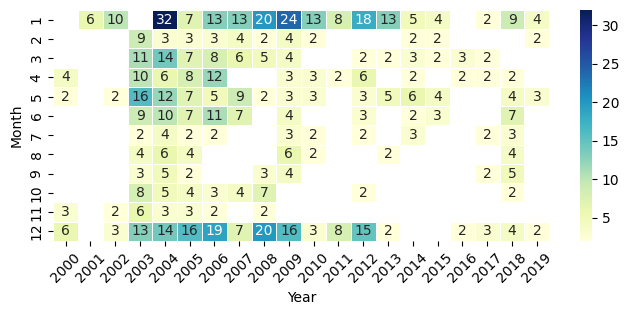

In [106]:
# # Heat Map
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Filter for valid motifs and neighbor sequences
# filtered_df = common_motifs_df[(common_motifs_df['Motif Sequence'].notna()) & (common_motifs_df['Nearest Neighbor Sequence'] != '()')] # Changed 'Neighbor Sequence' to 'Nearest Neighbor Sequence'

# # Count the occurrences of motifs and nearest neighbors by Year and Month
# monthly_counts = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Total_Count')

# # Pivot the data for heatmap compatibility
# heatmap_df = monthly_counts.pivot(index='Month', columns='Year', values='Total_Count')

# # Plot the heatmap
# plt.figure(figsize=(8, 3))
# sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".0f", linewidths=.5)
# # plt.title('Monthly Count of Motifs and Nearest Neighbors in Europe')
# plt.xlabel('Year')
# plt.xticks(rotation=45, fontsize=10)
# plt.ylabel('Month')

# plt.show()

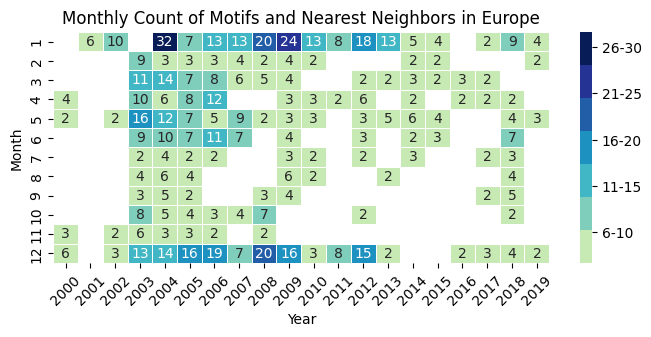

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter for valid motifs and neighbor sequences
filtered_df = common_motifs_df[(common_motifs_df['Motif Sequence'].notna()) & (common_motifs_df['Nearest Neighbor Sequence'] != '()')] # Changed 'Neighbor Sequence' to 'Nearest Neighbor Sequence'

# Count the occurrences of motifs and nearest neighbors by Year and Month
monthly_counts = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Total_Count')

# Pivot the data for heatmap compatibility
heatmap_df = monthly_counts.pivot(index='Month', columns='Year', values='Total_Count')

# Define custom discrete colors
custom_colors = ["#c7e9b4","#7fcdbb","#41b6c4","#1d91c0","#225ea8","#253494","#081d58"] # "#ffffd9","#edf8b1",

# Create a discrete colormap
cmap = sns.color_palette(custom_colors)

# Define colorbar ranges - Modified to match the number of ticks
# colorbar_ranges = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31+'] # This causes a mismatch
colorbar_ranges = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81+'] # Adjusted to match tick range

# Plot the heatmap with discrete colorbar and ranges
plt.figure(figsize=(8, 3))
ax = sns.heatmap(heatmap_df, annot=True, fmt=".0f", linewidths=.5, cmap=cmap,
            cbar_kws={"ticks": range(0, 100, 6)})  #Modified the ticks to match the labels

plt.title('Monthly Count of Motifs and Nearest Neighbors in Europe')
plt.xlabel('Year')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Month')

# Set colorbar tick labels after creating the heatmap
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels(colorbar_ranges) # Now the number of ticklabels and ticks would match.

plt.show()

Create a Histogram of Monthly Distribution

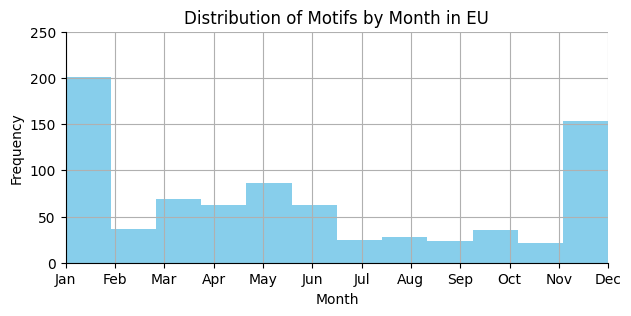

In [129]:
# ylim was set
import matplotlib.pyplot as plt

# Plotting the distribution of motifs by month as a histogram
plt.figure(figsize=(7, 3))

# Plot the histogram
ax = common_motifs_df['Month'].plot(kind='hist', bins=12, rwidth=1.0, color='skyblue')

# Set the x-axis limits to match the months
plt.xlim(1, 12)

# Set the y-axis limits (frequency) to a fixed range
plt.ylim(0, 250)  # Set the y-axis limit to 1000

# Adjust the x-axis to show each month clearly
plt.xlabel('Month', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of Motifs by Month in EU')

# Set custom x-ticks to place the month labels under each bar
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Remove the top and right spines for a cleaner look
plt.gca().spines[['top', 'right']].set_visible(False)

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()


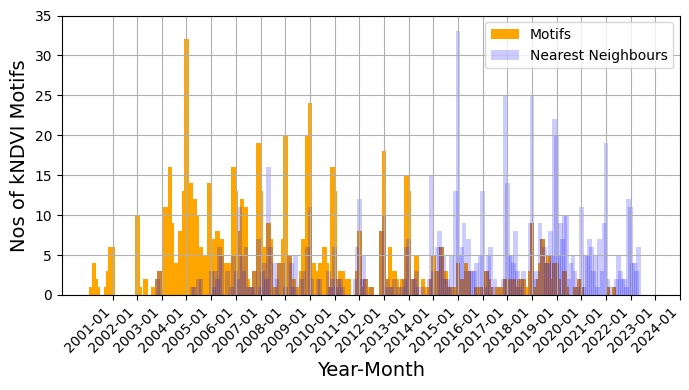

In [132]:
# Motif & NN Plot Together (with zero exclusion) Extended

import pandas as pd
from collections import defaultdict
import stumpy
import matplotlib.pyplot as plt

# Step 1: Create dictionaries to store motif and nearest neighbor occurrences by year and month
motif_occurrences_by_month = defaultdict(int)
neighbor_occurrences_by_month = defaultdict(int)

# Loop through the motif-neighbor pairs and count occurrences by month
for pixel_index, row in ndvi_pivot_filled.iterrows():
    ndvi_series = row.values
    dates = row.index  # Assuming the index of the row contains the dates

    window_size = 24
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Get the minimum distance (motif) and ensure it's not zero
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]

    if motif_distance > 0:  # Exclude cases where distance is exactly zero
        motif_time = pd.to_datetime(dates[motif_idx])  # Get the time of the motif
        motif_month = motif_time.strftime('%Y-%m')  # Extract year and month (e.g., '2000-02')

        # Increment count for the motif (year, month)
        motif_occurrences_by_month[motif_month] += 1

        # Identify the nearest neighbor and count its occurrence
        neighbor_idx = int(mp[motif_idx, 1])
        neighbor_time = pd.to_datetime(dates[neighbor_idx])
        neighbor_month = neighbor_time.strftime('%Y-%m')  # Extract year and month for nearest neighbor
        neighbor_occurrences_by_month[neighbor_month] += 1

# Step 2: Convert the dictionaries to DataFrames
motif_occurrences_df = pd.DataFrame(list(motif_occurrences_by_month.items()), columns=['Year-Month', 'Motif Count'])
neighbor_occurrences_df = pd.DataFrame(list(neighbor_occurrences_by_month.items()), columns=['Year-Month', 'Neighbor Count'])

# Merge the two DataFrames based on 'Year-Month' to have both motifs and neighbors in the same table
combined_df = pd.merge(motif_occurrences_df, neighbor_occurrences_df, on='Year-Month', how='outer').fillna(0)
combined_df['Year-Month'] = pd.to_datetime(combined_df['Year-Month'])

# Sort the DataFrame by 'Year-Month'
combined_df = combined_df.sort_values(by='Year-Month')

# Step 3: Plot the histogram of monthly motif and neighbor occurrences
plt.figure(figsize=(7, 4))

# Create bar plots for motifs and nearest neighbors
bar_width = 70  # Adjust the bar width as needed
plt.bar(combined_df['Year-Month'], combined_df['Motif Count'], width=bar_width, color='orange', label='Motifs')
plt.bar(combined_df['Year-Month'], combined_df['Neighbor Count'], width=bar_width, color='blue', alpha=0.2, label='Nearest Neighbours')

# Customize the plot
# plt.title('Monthly Number of Motif & Nearest Neighbours in South America', fontsize=14)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Nos of kNDVI Motifs', fontsize=14)
plt.ylim(0, 35)  # Set y-axis limits

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Customize x-axis to show only the first month of each year
first_month_of_years = pd.date_range(start='2000-02-01', end='2024-04-01', freq='YS')  # YS gives the first day of each year
plt.gca().set_xticks(first_month_of_years)
plt.gca().set_xticklabels([date.strftime('%Y-%m') for date in first_month_of_years], rotation=45, ha='right')

# Add gridlines for better visual clarity
plt.grid(True)

# Add legend for the bars
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


Get the 3 months with the highest & lowest counts for both motifs and nearest neighbors.

In [133]:
# Print 3 months with the highest & lowest counts for both motifs and nearest neighbors.

import pandas as pd
from collections import defaultdict
import stumpy

# Step 1: Create dictionaries to store motif and nearest neighbor occurrences by year and month
motif_occurrences_by_month = defaultdict(int)
neighbor_occurrences_by_month = defaultdict(int)

# Loop through the motif-neighbor pairs and count occurrences by month
for pixel_index, row in ndvi_pivot_filled.iterrows():
    ndvi_series = row.values
    dates = row.index

    window_size = 24
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Get the minimum distance (motif) and ensure it's not zero
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]

    if motif_distance > 0:
        motif_time = pd.to_datetime(dates[motif_idx])
        motif_month = motif_time.strftime('%Y-%m')

        # Increment count for the motif (year, month)
        motif_occurrences_by_month[motif_month] += 1

        # Identify the nearest neighbor and count its occurrence
        neighbor_idx = int(mp[motif_idx, 1])
        neighbor_time = pd.to_datetime(dates[neighbor_idx])
        neighbor_month = neighbor_time.strftime('%Y-%m')  # Extract year and month for nearest neighbor
        neighbor_occurrences_by_month[neighbor_month] += 1

# Step 2: Convert the dictionaries to DataFrames for easier manipulation
motif_occurrences_df = pd.DataFrame(list(motif_occurrences_by_month.items()), columns=['Year-Month', 'Motif Count'])
neighbor_occurrences_df = pd.DataFrame(list(neighbor_occurrences_by_month.items()), columns=['Year-Month', 'Neighbor Count'])

# Step 3: Sort by the count and get the top and bottom 3 months with the highest and lowest motif and nearest neighbor occurrences
top_3_motifs = motif_occurrences_df.sort_values(by='Motif Count', ascending=False).head(3)
bottom_3_motifs = motif_occurrences_df.sort_values(by='Motif Count', ascending=True).head(3)

top_3_neighbors = neighbor_occurrences_df.sort_values(by='Neighbor Count', ascending=False).head(3)
bottom_3_neighbors = neighbor_occurrences_df.sort_values(by='Neighbor Count', ascending=True).head(3)

# Print the top and bottom 3 months with the highest and lowest number of motifs and nearest neighbors
print("Top 3 months with the highest number of motifs:")
print(top_3_motifs)

print("\nBottom 3 months with the lowest number of motifs:")
print(bottom_3_motifs)

print("\nTop 3 months with the highest number of nearest neighbors:")
print(top_3_neighbors)

print("\nBottom 3 months with the lowest number of nearest neighbors:")
print(bottom_3_neighbors)


Top 3 months with the highest number of motifs:
   Year-Month  Motif Count
29    2004-01           32
20    2009-01           24
9     2008-12           20

Bottom 3 months with the lowest number of motifs:
    Year-Month  Motif Count
168    2000-06            1
170    2017-05            1
172    2013-11            1

Top 3 months with the highest number of nearest neighbors:
   Year-Month  Neighbor Count
48    2015-01              33
28    2018-01              25
10    2016-12              25

Bottom 3 months with the lowest number of nearest neighbors:
    Year-Month  Neighbor Count
174    2012-05               1
173    2016-02               1
172    2021-03               1


# Section 5: Calling in Climate Indicators

In [137]:
# Calling up the Climate Indicators from GDrive

# !pip install gdown
import gdown

clim_info = clim_info = [
    ('13Q_qmtnMGBN1LkyiyvajRXhzm12A3mSJ', 'ENSO'),  # File ID 1 with Column Name
    ('1kLl7daQu7rGMNm2KnymjICujX_4rjCG3', 'NAO'),
    ('1t15X7buXTXXo5Io2uZgGbrj0uKeMXxYa', 'PNA'),
    ('1tQEm2q34PNfgtnBOudWSeu8RzMWQc65B', 'AO')
]

# https://docs.google.com/spreadsheets/d/13Q_qmtnMGBN1LkyiyvajRXhzm12A3mSJ/edit?usp=sharing&ouid=103630102064935098158&rtpof=true&sd=true
# https://docs.google.com/spreadsheets/d/1kLl7daQu7rGMNm2KnymjICujX_4rjCG3/edit?usp=sharing&ouid=103630102064935098158&rtpof=true&sd=true
# https://docs.google.com/spreadsheets/d/1t15X7buXTXXo5Io2uZgGbrj0uKeMXxYa/edit?usp=sharing&ouid=103630102064935098158&rtpof=true&sd=true
# https://docs.google.com/spreadsheets/d/1tQEm2q34PNfgtnBOudWSeu8RzMWQc65B/edit?usp=sharing&ouid=103630102064935098158&rtpof=true&sd=true


# Initialize an empty DataFrame to store the final data
climate_df = pd.DataFrame()

for i, (file_id, column_name) in enumerate(clim_info):
    # Construct the URL to download the file
    url = f'https://drive.google.com/uc?id={file_id}'

    # Download the file
    output = f'file_{file_id}.xlsx' # .csv
    gdown.download(url, output, quiet=False)

    # Read the file into a DataFrame
    # cl_df = pd.read_csv(output)
    cl_df = pd.read_excel(output)

    # Use the 'Date' and 'Value' columns from the first dataset
    if i == 0:
        climate_df['date'] = cl_df['date']
        climate_df[column_name] = cl_df['Value']
    # Use only the 'kndvi' column from subsequent datasets
    else:
        climate_df[column_name] = cl_df['Value']

# Display the final DataFrame
print(climate_df.head())

Downloading...
From: https://drive.google.com/uc?id=13Q_qmtnMGBN1LkyiyvajRXhzm12A3mSJ
To: /content/file_13Q_qmtnMGBN1LkyiyvajRXhzm12A3mSJ.xlsx
100%|██████████| 12.9k/12.9k [00:00<00:00, 11.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kLl7daQu7rGMNm2KnymjICujX_4rjCG3
To: /content/file_1kLl7daQu7rGMNm2KnymjICujX_4rjCG3.xlsx
100%|██████████| 14.2k/14.2k [00:00<00:00, 16.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t15X7buXTXXo5Io2uZgGbrj0uKeMXxYa
To: /content/file_1t15X7buXTXXo5Io2uZgGbrj0uKeMXxYa.xlsx
100%|██████████| 14.2k/14.2k [00:00<00:00, 14.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tQEm2q34PNfgtnBOudWSeu8RzMWQc65B
To: /content/file_1tQEm2q34PNfgtnBOudWSeu8RzMWQc65B.xlsx
100%|██████████| 14.4k/14.4k [00:00<00:00, 15.6MB/s]

        date   ENSO   NAO   PNA     AO
0 2000-02-01  26.75  1.70  1.12  1.076
1 2000-03-01  27.24  0.77  1.28 -0.451
2 2000-04-01  27.72 -0.03 -0.35 -0.279
3 2000-05-01  27.81  1.58 -0.28  0.969
4 2000-06-01  27.59 -0.03 -1.22  0.586


In [138]:
climate_df.set_index('date', inplace=True)

#Section 6: Compare the Matrix Profiles for KNDVI and the Climate Indicators.
i. Climate Indicators

In [ ]:
import numpy as np
import pandas as pd
import stumpy
import matplotlib.pyplot as plt

# Define window size for motif detection
window_size = 24  # Adjust based on your analysis

# Step 1: Compute the Matrix Profiles for KNDVI and Climate Indicators

# Compute matrix profiles for KNDVI from the pivot table
kndvi_profiles = {}
for idx, row in ndvi_pivot.iterrows():
    kndvi_profiles[idx] = stumpy.stump(row.values, m=window_size)

# Compute the matrix profiles for climate indicators
climate_profiles = {}
for feature in ['AO', 'NAO', 'ENSO', 'PNA']:
    climate_profiles[feature] = stumpy.stump(climate_df[feature].values, m=window_size)

# Step 2: Extract Motifs, Nearest Neighbors, and Discords

def extract_motifs(profile, series, m, num_neighbors=2):
    """Extract motif, two nearest neighbors, and discord from the matrix profile."""

    # Identify motif (smallest matrix profile value)
    motif_idx = np.argmin(profile[:, 0])

    # Get the indices of the two nearest neighbors sorted by distance
    sorted_indices = np.argsort(profile[:, 0])  # Sorted by distance
    nearest_neighbor_indices = [int(profile[idx, 1]) for idx in sorted_indices if profile[idx, 0] > 0][:num_neighbors]

    # Identify discord (largest matrix profile value)
    discord_idx = np.argmax(profile[:, 0])

    # Extract motif, neighbors, and discord sequences
    motif = series[motif_idx:motif_idx + m]
    nearest_neighbors = [series[idx:idx + m] for idx in nearest_neighbor_indices]
    discord = series[discord_idx:discord_idx + m]

    return motif, nearest_neighbors, motif_idx, nearest_neighbor_indices, discord, discord_idx

# Extract motifs, 2 nearest neighbors, and discord for KNDVI
kndvi_motifs_list = []
for idx, profile in kndvi_profiles.items():
    kndvi_series = ndvi_pivot.loc[idx].values
    motif, nearest_neighbors, motif_idx, nearest_neighbor_indices, discord, discord_idx = extract_motifs(profile, kndvi_series, window_size)

    kndvi_motifs_list.append({
        'latitude': idx[0],
        'longitude': idx[1],
        'motif_start': ndvi_pivot.columns[motif_idx],
        'nearest_neighbor_1_start': ndvi_pivot.columns[nearest_neighbor_indices[0]],
        'nearest_neighbor_2_start': ndvi_pivot.columns[nearest_neighbor_indices[1]],
        'discord_start': ndvi_pivot.columns[discord_idx]
    })

kndvi_motifs_df = pd.DataFrame(kndvi_motifs_list)

# Extract motifs, 2 nearest neighbors, and discord for climate indicators
climate_motifs_list = []
for feature, profile in climate_profiles.items():
    series = climate_df[feature].values
    motif, nearest_neighbors, motif_idx, nearest_neighbor_indices, discord, discord_idx = extract_motifs(profile, series, window_size)

    climate_motifs_list.append({
        'feature': feature,
        'motif_start': climate_df.iloc[:, 0].iloc[motif_idx],
        'nearest_neighbor_1_start': climate_df.iloc[:, 0].iloc[nearest_neighbor_indices[0]],
        'nearest_neighbor_2_start': climate_df.iloc[:, 0].iloc[nearest_neighbor_indices[1]],
        'discord_start': climate_df.iloc[:, 0].iloc[discord_idx]
    })

climate_motifs_df = pd.DataFrame(climate_motifs_list)

# Display the results
print("KNDVI Motifs and Nearest Neighbors")
print(kndvi_motifs_df.head())

print("\nClimate Indicator Motifs and Nearest Neighbors")
print(climate_motifs_df.head())


KNDVI Motifs and Nearest Neighbors
   latitude  longitude motif_start nearest_neighbor_1_start  \
0     43.06      41.39  2000-02-01               2024-04-01   
1     43.06      41.45  2000-02-01               2024-04-01   
2     43.06      41.51  2000-02-01               2024-04-01   
3     43.08      41.40  2000-02-01               2024-04-01   
4     43.08      41.46  2000-02-01               2024-04-01   

  nearest_neighbor_2_start discord_start  
0               2024-04-01    2000-02-01  
1               2024-04-01    2000-02-01  
2               2024-04-01    2000-02-01  
3               2024-04-01    2000-02-01  
4               2024-04-01    2000-02-01  

Climate Indicator Motifs and Nearest Neighbors
  feature  motif_start  nearest_neighbor_1_start  nearest_neighbor_2_start  \
0      AO        26.75                     26.75                     26.55   
1     NAO        27.83                     27.94                     27.83   
2    ENSO        26.45                     26.

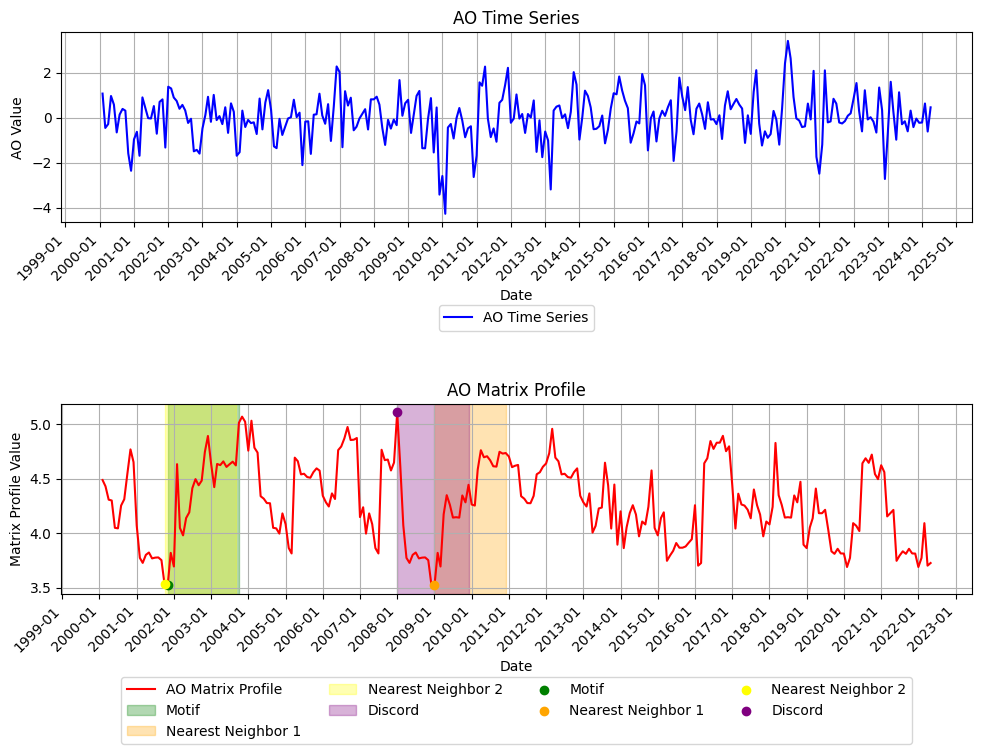

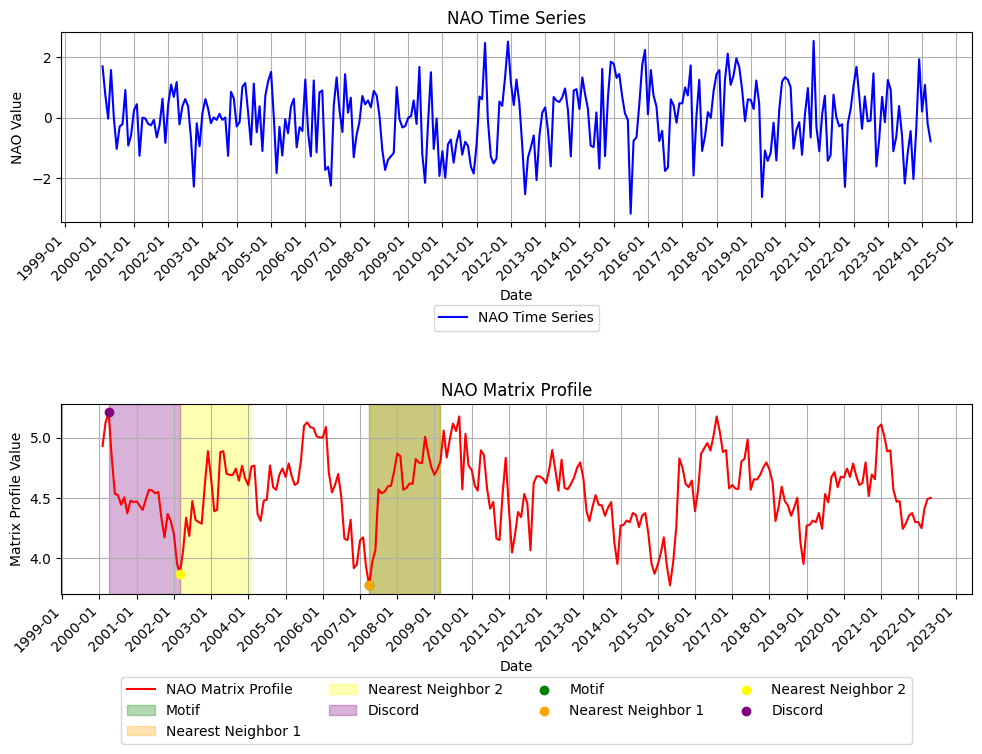

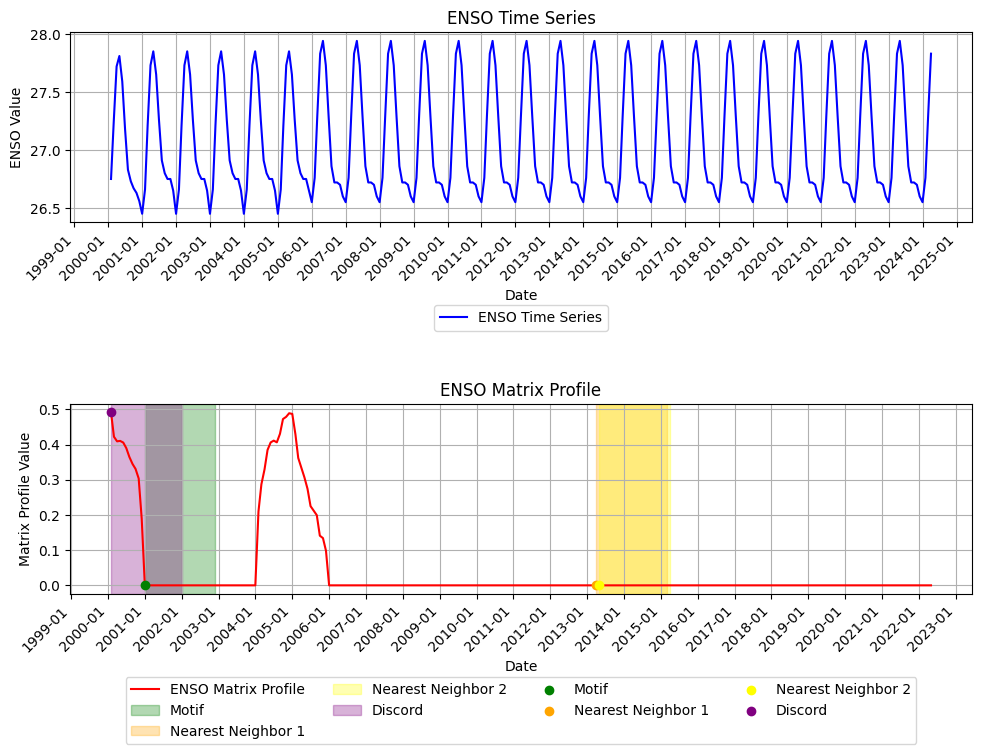

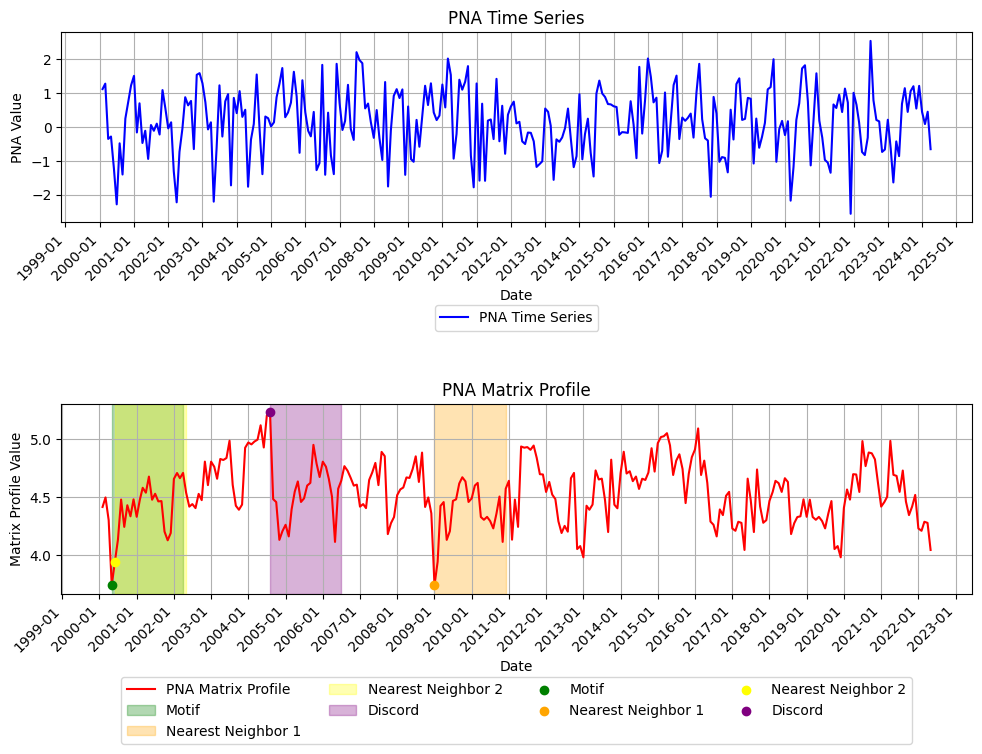

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Function to create the dual plot for each climate indicator
def plot_climate_indicator_and_profile(climate_series, climate_profile, title, dates, window_size=24):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # Two frames stacked vertically

    # First frame: Climate time series
    axs[0].plot(dates, climate_series, label=f'{title} Time Series', color='blue')
    axs[0].set_title(f'{title} Time Series')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel(f'{title} Value')
    axs[0].grid(True)

    # Second frame: Matrix profile of the climate indicator
    axs[1].plot(dates[:len(climate_profile)], climate_profile[:, 0], label=f'{title} Matrix Profile', color='red')

    # Identify motifs (minimum matrix profile value)
    motif_idx = np.argmin(climate_profile[:, 0])

    # Identify two nearest neighbors
    sorted_indices = np.argsort(climate_profile[:, 0])
    nearest_neighbor_1_idx = int(climate_profile[sorted_indices[1], 1])  # 1st nearest neighbor
    nearest_neighbor_2_idx = int(climate_profile[sorted_indices[2], 1])  # 2nd nearest neighbor

    # Identify discord (maximum matrix profile value)
    discord_idx = np.argmax(climate_profile[:, 0])

    # Ensure indices are within valid range
    if nearest_neighbor_1_idx >= len(dates): nearest_neighbor_1_idx = motif_idx
    if nearest_neighbor_2_idx >= len(dates): nearest_neighbor_2_idx = motif_idx
    if discord_idx >= len(dates): discord_idx = motif_idx

    # Highlight the entire duration of motif, nearest neighbors, and discord
    def highlight_period(ax, start_idx, color, label):
        start_date = dates[start_idx]
        end_date = dates[min(start_idx + window_size - 1, len(dates) - 1)]
        ax.axvspan(start_date, end_date, color=color, alpha=0.3, label=label)

    # Highlight motif and nearest neighbors
    highlight_period(axs[1], motif_idx, 'green', 'Motif')
    highlight_period(axs[1], nearest_neighbor_1_idx, 'orange', 'Nearest Neighbor 1')
    highlight_period(axs[1], nearest_neighbor_2_idx, 'yellow', 'Nearest Neighbor 2')
    highlight_period(axs[1], discord_idx, 'purple', 'Discord')

    # Scatter markers for start points
    axs[1].scatter(dates[motif_idx], climate_profile[motif_idx, 0], color='green', label='Motif', zorder=5)
    axs[1].scatter(dates[nearest_neighbor_1_idx], climate_profile[nearest_neighbor_1_idx, 0], color='orange', label='Nearest Neighbor 1', zorder=5)
    axs[1].scatter(dates[nearest_neighbor_2_idx], climate_profile[nearest_neighbor_2_idx, 0], color='yellow', label='Nearest Neighbor 2', zorder=5)
    axs[1].scatter(dates[discord_idx], climate_profile[discord_idx, 0], color='purple', label='Discord', zorder=5)

    axs[1].set_title(f'{title} Matrix Profile')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Matrix Profile Value')
    axs[1].grid(True)

    # Format the x-axis for better readability
    for ax in axs:
        ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks at each year
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate labels

    # Adjust layout and place legends outside the plot
    axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=4)
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=4)

    plt.tight_layout()
    plt.show()

# Loop through each climate indicator and create plots
for feature in ['AO', 'NAO', 'ENSO', 'PNA']:
    series = climate_df[feature].values
    profile = climate_profiles[feature]
    plot_climate_indicator_and_profile(series, profile, feature, climate_df.index)


# Section 7: Identify where the dattes of motif and nearest neighbour of CI correspond to the dates and the nearest neighbours in the KNDVI.

In [ ]:
"""
This script below extracts motifs, two nearest neighbors, and discords from both KNDVI and climate indicators (AO, NAO, ENSO, PNA) and compares them based on their time proximity.
If a KNDVI motif occurs within ±1 month of a climate motif, it is stored in matched_motifs_df.
Then, the script attempts to visualize the matched motifs and nearest neighbors.
"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Function to extract motifs, 2 nearest neighbors, and discord from matrix profile
def extract_motifs_and_neighbors(series, profile, dates, window_size=24):
    motif_idx = np.argmin(profile[:, 0])  # Smallest matrix profile value (Motif)
    sorted_indices = np.argsort(profile[:, 0])  # Sorted distances

    # Extract 2 nearest neighbors
    nearest_neighbor_1_idx = int(profile[sorted_indices[1], 1]) if sorted_indices[1] < len(dates) else motif_idx
    nearest_neighbor_2_idx = int(profile[sorted_indices[2], 1]) if sorted_indices[2] < len(dates) else motif_idx

    # Extract discord (maximum matrix profile value)
    discord_idx = np.argmax(profile[:, 0])  # Largest matrix profile value
    discord_idx = discord_idx if discord_idx < len(dates) else motif_idx  # Ensure valid index

    return {
        'motif_idx': motif_idx,
        'motif_date': dates[motif_idx],
        'nearest_neighbor_1_idx': nearest_neighbor_1_idx,
        'nearest_neighbor_1_date': dates[nearest_neighbor_1_idx],
        'nearest_neighbor_2_idx': nearest_neighbor_2_idx,
        'nearest_neighbor_2_date': dates[nearest_neighbor_2_idx],
        'discord_idx': discord_idx,
        'discord_date': dates[discord_idx]
    }

# Initialize a list to store the results
matched_motifs_list = []

# Loop through each climate indicator and KNDVI to extract and match motifs
for feature in ['AO', 'NAO', 'ENSO', 'PNA']:
    climate_series = climate_df[feature].values
    climate_profile = climate_profiles[feature]

    # Extract motifs and nearest neighbors for the climate indicator
    climate_motif_data = extract_motifs_and_neighbors(climate_series, climate_profile, climate_df.index)

    # Extract motifs and nearest neighbors for KNDVI
    for idx in kndvi_profiles.keys():  # Loop over all KNDVI pixels
        kndvi_series = ndvi_pivot.loc[idx].values
        kndvi_profile = kndvi_profiles[idx]

        kndvi_motif_data = extract_motifs_and_neighbors(kndvi_series, kndvi_profile, ndvi_pivot.columns)

        # Loosely match motifs based on proximity (± 1 month)
        if abs((pd.Timestamp(kndvi_motif_data['motif_date']) - pd.Timestamp(climate_motif_data['motif_date'])).days) <= 30:
            matched_motifs_list.append({
                'feature': feature,
                'latitude': idx[0],
                'longitude': idx[1],
                'KNDVI Motif Date': kndvi_motif_data['motif_date'],
                'KNDVI Nearest 1 Date': kndvi_motif_data['nearest_neighbor_1_date'],
                'KNDVI Nearest 2 Date': kndvi_motif_data['nearest_neighbor_2_date'],
                'KNDVI Discord Date': kndvi_motif_data['discord_date'],
                'Climate Motif Date': climate_motif_data['motif_date'],
                'Climate Nearest 1 Date': climate_motif_data['nearest_neighbor_1_date'],
                'Climate Nearest 2 Date': climate_motif_data['nearest_neighbor_2_date'],
                'Climate Discord Date': climate_motif_data['discord_date']
            })

# Convert the list to a DataFrame
matched_motifs_df = pd.DataFrame(matched_motifs_list)

# Ensure there are motifs to plot
if matched_motifs_df.empty:
    print("No matched motifs found. Adjust motif matching criteria.")
else:
    print("Matched motifs and nearest neighbors between KNDVI and Climate Indicators:")
    print(matched_motifs_df)

    # Plotting the results
    for index, row in matched_motifs_df.iterrows():
        fig, axs = plt.subplots(2, 1, figsize=(10, 8))

        # KNDVI Plot
        kndvi_series = ndvi_pivot.loc[(row['latitude'], row['longitude'])].values
        kndvi_profile = kndvi_profiles[(row['latitude'], row['longitude'])]
        dates = ndvi_pivot.columns

        axs[0].plot(dates, kndvi_series, label=f'KNDVI Time Series', color='blue')
        axs[0].scatter(row['KNDVI Motif Date'], kndvi_series[row['motif_idx']], color='green', label='KNDVI Motif')
        axs[0].scatter(row['KNDVI Nearest 1 Date'], kndvi_series[row['nearest_neighbor_1_idx']], color='orange', label='KNDVI Nearest Neighbor 1')
        axs[0].scatter(row['KNDVI Nearest 2 Date'], kndvi_series[row['nearest_neighbor_2_idx']], color='yellow', label='KNDVI Nearest Neighbor 2')
        axs[0].scatter(row['KNDVI Discord Date'], kndvi_series[row['discord_idx']], color='purple', label='KNDVI Discord')
        axs[0].set_title(f'KNDVI Time Series for (lat:{row["latitude"]}, lon:{row["longitude"]})')
        axs[0].set_xlabel('Date')
        axs[0].set_ylabel('KNDVI Value')
        axs[0].grid(True)

        # Climate Indicator Plot
        climate_series = climate_df[row['feature']].values
        climate_profile = climate_profiles[row['feature']]

        axs[1].plot(climate_df.index, climate_series, label=f'{row["feature"]} Time Series', color='blue')
        axs[1].scatter(row['Climate Motif Date'], climate_series[row['motif_idx']], color='green', label=f'{row["feature"]} Motif')
        axs[1].scatter(row['Climate Discord Date'], climate_series[row['discord_idx']], color='purple', label=f'{row["feature"]} Discord')

        plt.tight_layout()
        plt.show()


No matched motifs found. Adjust motif matching criteria.


# *** Identify the actual vlaues where the motifs were identified for each CI and KNDVI

#Section: 8: Compare the Matrix Profiles for KNDVI and the Climate Indicators.

In [ ]:
# !pip install stumpy
import stumpy
import pandas as pd
import numpy as np

# Define window size for motif detection
window_size = 24  # Adjust based on your analysis

# Step 1: Compute Matrix Profiles for KNDVI (for each pixel) and Climate Indicators

# Compute the matrix profiles for KNDVI (each pixel in the pivot table)
kndvi_profiles = {}
for pixel in ndvi_pivot.index:
    kndvi_series = ndvi_pivot.loc[pixel].values  # Get time series for each pixel
    kndvi_profiles[pixel] = stumpy.stump(kndvi_series, m=window_size)

# Compute the matrix profiles for climate indicators (assuming they're time series)
climate_profiles = {}
for feature in ['AO', 'NAO', 'ENSO', 'PNA']:
    climate_profiles[feature] = stumpy.stump(climate_df[feature].values, m=window_size)

# Step 2: Extract Motifs and Nearest Neighbors

# Function to extract motifs and nearest neighbors
def extract_motifs(profile, series, m):
    motif_idx = np.argmin(profile[:, 0])
    nearest_neighbor_idx = int(profile[motif_idx, 1])

    motif = series[motif_idx:motif_idx + m]
    nearest_neighbor = series[nearest_neighbor_idx:nearest_neighbor_idx + m]

    return motif, nearest_neighbor, motif_idx, nearest_neighbor_idx

# Extract motifs and nearest neighbors for KNDVI
kndvi_motifs = []
for pixel, profile in kndvi_profiles.items():
    kndvi_series = ndvi_pivot.loc[pixel].values
    motif, nearest_neighbor, motif_idx, nearest_neighbor_idx = extract_motifs(profile, kndvi_series, window_size)
    kndvi_motifs.append({
        'pixel': pixel,
        'motif_start': motif_idx,
        'motif_neighbor_start': nearest_neighbor_idx
    })

# Extract motifs and nearest neighbors for climate indicators
climate_motifs = []
for feature, profile in climate_profiles.items():
    series = climate_df[feature].values
    motif, nearest_neighbor, motif_idx, nearest_neighbor_idx = extract_motifs(profile, series, window_size)
    climate_motifs.append({
        'feature': feature,
        'motif_start': motif_idx,
        'motif_neighbor_start': nearest_neighbor_idx
    })

# Step 3: Compare the Motifs and Matrix Profiles

# Step 3: Compare the Motifs and Matrix Profiles

# Function to compare matrix profiles and calculate correlation
def compare_profiles(profile1, profile2):
    # Convert the matrix profiles to numeric types if they are not
    profile1 = pd.to_numeric(profile1[:, 0], errors='coerce')
    profile2 = pd.to_numeric(profile2[:, 0], errors='coerce')

    # Only compare valid (finite) values in the matrix profiles
    # Ensure profile1 and profile2 are the same length
    min_length = min(len(profile1), len(profile2))
    profile1 = profile1[:min_length]
    profile2 = profile2[:min_length]

    valid_mask = np.isfinite(profile1) & np.isfinite(profile2)
    if np.sum(valid_mask) == 0:
        return None
    return np.corrcoef(profile1[valid_mask], profile2[valid_mask])[0, 1]

# Compare matrix profiles for KNDVI and climate indicators
comparisons = []
for pixel, kndvi_profile in kndvi_profiles.items():
    for feature, climate_profile in climate_profiles.items():
        correlation = compare_profiles(kndvi_profile, climate_profile)  # Compare the profiles
        comparisons.append({
            'pixel': pixel,
            'climate_feature': feature,
            'correlation': correlation
        })

# Convert comparisons to DataFrame for better readability
comparisons_df = pd.DataFrame(comparisons)

# Step 4: Save the results to CSV for further analysis
kndvi_motifs_df = pd.DataFrame(kndvi_motifs)
climate_motifs_df = pd.DataFrame(climate_motifs)
kndvi_motifs_df.to_csv('kndvi_motifs.csv', index=False)
# climate_motifs_df.to_csv('climate_motifs.csv',
climate_motifs_df.to_csv('climate_motifs.csv', index=False)
comparisons_df.to_csv('kndvi_climate_comparisons.csv', index=False)

/usr/local/lib/python3.11/dist-packages/stumpy/core.py:2257: RuntimeWarning: divide by zero encountered in divide
  Σ_T_inverse = 1.0 / Σ_T


# Section 9: MP Plotting for kNDVI and Climate Indicators ( Gantt)


   latitude  longitude                          KNDVI Motif Period  \
0     43.06      41.39  (2006-12-01 00:00:00, 2008-11-01 00:00:00)   
1     43.06      41.39  (2006-12-01 00:00:00, 2008-11-01 00:00:00)   
2     43.06      41.39  (2006-12-01 00:00:00, 2008-11-01 00:00:00)   
3     43.06      41.39  (2006-12-01 00:00:00, 2008-11-01 00:00:00)   
4     43.06      41.39  (2006-12-01 00:00:00, 2008-11-01 00:00:00)   

                KNDVI Nearest Neighbor Period  KNDVI Value Climate Indicator  \
0  (2006-12-01 00:00:00, 2008-11-01 00:00:00)      0.79275                AO   
1  (2006-12-01 00:00:00, 2008-11-01 00:00:00)      0.79275                AO   
2  (2006-12-01 00:00:00, 2008-11-01 00:00:00)      0.79275                AO   
3  (2013-12-01 00:00:00, 2015-11-01 00:00:00)      0.79275                AO   
4  (2013-12-01 00:00:00, 2015-11-01 00:00:00)      0.79275                AO   

                         Climate Motif Period  \
0  (2001-11-01 00:00:00, 2003-10-01 00:00:00)   


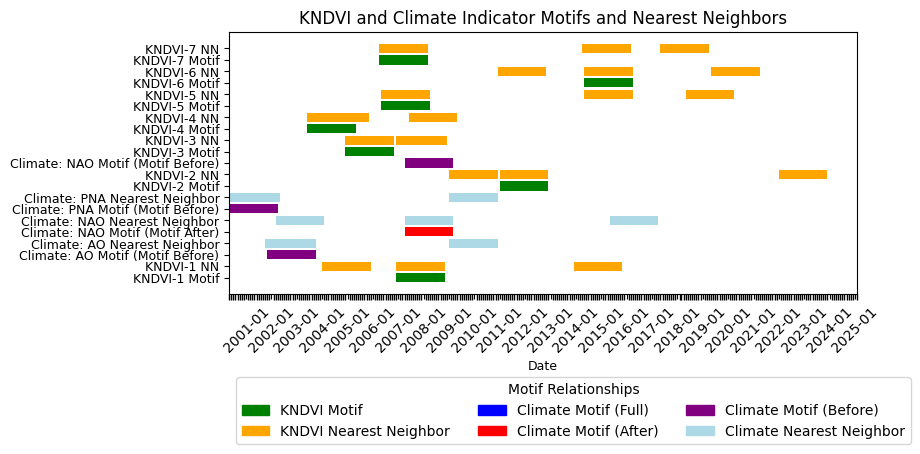

Shortest Lags:
      latitude  longitude  Lag Between KNDVI and Climate Motifs (Months)
5989     43.35      41.83                                           -252
5987     43.35      41.83                                           -252
5988     43.35      41.83                                           -252
5990     43.35      41.83                                           -252

Longest Lags:
       latitude  longitude  Lag Between KNDVI and Climate Motifs (Months)
22285     44.02       40.3                                             85
22287     44.02       40.3                                             85
22286     44.02       40.3                                             85
22288     44.02       40.3                                             85


In [139]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num

# Set window size for STUMPY matrix profile
window_size = 24
num_nearest_neighbors = 2

# Initialize a list to store results for KNDVI and climate comparisons
results = []
plot_data = []

# Function to extract motif and nearest neighbors from a time series
def extract_motif_and_nearest_neighbors(series, profile, dates, num_neighbors=2):
    motif_idx = np.argmin(profile[:, 0])

    # Get indices of the 2 nearest neighbors sorted by distance
    sorted_indices = np.argsort(profile[:, 0])[:num_nearest_neighbors + 1]  # +1 to include the motif itself

    # Prepare lists to hold nearest neighbor periods and indices
    nearest_neighbor_periods = []
    nearest_neighbor_indices = []

    for idx in sorted_indices:
        if profile[idx, 0] == 0:  # Exclude zero distance
            continue

        nearest_neighbor_idx = int(profile[idx, 1])
        nearest_neighbor_period = (pd.Timestamp(dates[nearest_neighbor_idx]), pd.Timestamp(dates[nearest_neighbor_idx + window_size - 1]))
        nearest_neighbor_periods.append(nearest_neighbor_period)
        nearest_neighbor_indices.append(nearest_neighbor_idx)

    # Return motif period, and nearest neighbor periods & indices
    if nearest_neighbor_periods:
        motif_period = (pd.Timestamp(dates[motif_idx]), pd.Timestamp(dates[motif_idx + window_size - 1]))
        return motif_period, nearest_neighbor_periods, motif_idx, nearest_neighbor_indices
    else:
        return None, None, None, None

# Function to calculate lag in months
def calculate_monthly_lag(start_date1, start_date2):
    return (start_date2.year - start_date1.year) * 12 + (start_date2.month - start_date1.month)

# Loop through each pixel in the KNDVI dataset
kndvi_codes = {}
for pixel_index, (lat, lon) in enumerate(ndvi_pivot_filled.index):
    kndvi_code = f"KNDVI-{pixel_index+1}"
    kndvi_codes[(lat, lon)] = kndvi_code  # Store for later labeling

    kndvi_series = ndvi_pivot_filled.loc[(lat, lon)].values
    dates = ndvi_pivot_filled.columns

    # Compute matrix profile for the KNDVI pixel
    kndvi_mp = stumpy.stump(kndvi_series, m=window_size)

    # Extract motif and 2 nearest neighbors for KNDVI
    kndvi_motif_period, kndvi_nearest_neighbor_periods, kndvi_motif_idx, kndvi_nearest_neighbor_indices = extract_motif_and_nearest_neighbors(kndvi_series, kndvi_mp, dates, num_nearest_neighbors)

    # Skip if motif or nearest neighbor has zero distance or no valid motif was found
    if kndvi_motif_period is None:
        continue

    # Now compare with each climate indicator
    for feature in ['AO', 'NAO', 'ENSO', 'PNA']:
        climate_series = climate_df[feature].values
        climate_dates = climate_df.index

        # Compute matrix profile for the climate indicator
        climate_mp = stumpy.stump(climate_series, m=window_size)

        # Extract motif and 2 nearest neighbors for the climate series
        climate_motif_period, climate_nearest_neighbor_periods, climate_motif_idx, climate_nearest_neighbor_indices = extract_motif_and_nearest_neighbors(climate_series, climate_mp, climate_dates, num_nearest_neighbors)

        # Skip if motif or nearest neighbor has zero distance or no valid motif was found
        if climate_motif_period is None:
            continue

        # Calculate lags and store information for each of the nearest neighbors
        for i in range(len(kndvi_nearest_neighbor_periods)):
            kndvi_nearest_neighbor_start = pd.Timestamp(kndvi_nearest_neighbor_periods[i][0])
            kndvi_nearest_neighbor_lag = calculate_monthly_lag(pd.Timestamp(kndvi_motif_period[0]), kndvi_nearest_neighbor_start)

            for j in range(len(climate_nearest_neighbor_periods)):
                climate_nearest_neighbor_start = pd.Timestamp(climate_nearest_neighbor_periods[j][0])
                climate_nearest_neighbor_lag = calculate_monthly_lag(pd.Timestamp(climate_motif_period[0]), climate_nearest_neighbor_start)

                lag = calculate_monthly_lag(pd.Timestamp(kndvi_motif_period[0]), pd.Timestamp(climate_motif_period[0]))

                # Classify the motifs: Full, Before, After
                if kndvi_motif_period[0] == climate_motif_period[0]:
                    motif_type = 'Motif Full'
                elif climate_motif_period[0] < kndvi_motif_period[0]:
                    motif_type = 'Motif Before'
                else:
                    motif_type = 'Motif After'

                # Retrieve KNDVI value for the motif period
                kndvi_value = kndvi_series[kndvi_motif_idx]

                # Retrieve Climate indicator value for the motif period
                climate_value = climate_series[climate_motif_idx]

                # Store the results for analysis
                results.append({
                    'latitude': lat,
                    'longitude': lon,
                    'KNDVI Motif Period': kndvi_motif_period,
                    'KNDVI Nearest Neighbor Period': kndvi_nearest_neighbor_periods[i],
                    'KNDVI Value': kndvi_value,
                    'Climate Indicator': feature,
                    'Climate Motif Period': climate_motif_period,
                    'Climate Nearest Neighbor Period': climate_nearest_neighbor_periods[j],
                    'Climate Value': climate_value,
                    'KNDVI Nearest Neighbor Lag (Months)': kndvi_nearest_neighbor_lag,
                    'Climate Nearest Neighbor Lag (Months)': climate_nearest_neighbor_lag,
                    'Lag Between KNDVI and Climate Motifs (Months)': lag,
                    'Motif Type': motif_type
                })

                # Prepare the data for plotting
                plot_data.append({
                    'Task': kndvi_code,
                    'Latitude': lat,
                    'Longitude': lon,
                    'Start': kndvi_motif_period[0],
                    'Finish': kndvi_motif_period[1],
                    'Color': 'green'  # KNDVI motif
                })
                plot_data.append({
                    'Task': f'{kndvi_code} Nearest Neighbor',
                    'Latitude': lat,
                    'Longitude': lon,
                    'Start': kndvi_nearest_neighbor_periods[i][0],
                    'Finish': kndvi_nearest_neighbor_periods[i][1],
                    'Color': 'orange'  # KNDVI nearest neighbor
                })
                plot_data.append({
                    'Task': f'Climate: {feature} Motif ({motif_type})',
                    'Latitude': lat,
                    'Longitude': lon,
                    'Start': climate_motif_period[0],
                    'Finish': climate_motif_period[1],
                    'Color': 'blue' if motif_type == 'Motif Full' else 'red' if motif_type == 'Motif After' else 'purple'  # Climate motif
                })
                plot_data.append({
                    'Task': f'Climate: {feature} Nearest Neighbor',
                    'Latitude': lat,
                    'Longitude': lon,
                    'Start': climate_nearest_neighbor_periods[j][0],
                    'Finish': climate_nearest_neighbor_periods[j][1],
                    'Color': 'lightblue'  # Climate nearest neighbor
                })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Save results to CSV if needed
results_df.to_csv('kndvi_climate_motif_analysis_with_lags.csv', index=False)

# Display the first few rows of the results
print(results_df.head())

###################### Plotting KNDVI Motifs and Climate Indicator Motifs

# Prepare data for Gantt chart
def prepare_gantt_data(plot_data):
    gantt_data = []

    for entry in plot_data:
        gantt_data.append({
            'Task': entry['Task'],
            'Latitude': entry['Latitude'],
            'Longitude': entry['Longitude'],
            'Start': entry['Start'],
            'Finish': entry['Finish'],
            'Color': entry['Color']
        })

    return gantt_data

# Function to plot Gantt chart with color coding and simplified KNDVI labels
def plot_gantt_chart_with_adjusted_labels(gantt_data):
    gantt_data_df = pd.DataFrame(gantt_data)

    # Sort Gantt data by latitude and longitude for better visualization
    gantt_data_df = gantt_data_df.sort_values(by=['Latitude', 'Longitude'])

    # Filter to include only 7 unique KNDVI pixels based on unique lat/lon pairs
    unique_lat_lon = gantt_data_df.drop_duplicates(subset=['Latitude', 'Longitude'])[['Latitude', 'Longitude']].head(7)
    gantt_data_df = gantt_data_df[gantt_data_df[['Latitude', 'Longitude']].apply(tuple, axis=1).isin(unique_lat_lon.apply(tuple, axis=1))]

    tasks = gantt_data_df['Task']
    starts = gantt_data_df['Start']
    finishes = gantt_data_df['Finish']
    colors = gantt_data_df['Color']

    # Increase figure size for better label visibility
    fig, ax = plt.subplots(figsize=(9, 5))  # Adjusted size to make the plot smaller for 7 pixels

    # Plot the Gantt bars with increased height for better visibility
    for i, task in enumerate(tasks):
        ax.barh(task, left=date2num(starts.iloc[i]), width=(date2num(finishes.iloc[i]) - date2num(starts.iloc[i])),
                height=0.8, align='center', color=colors.iloc[i], edgecolor='None')

    # Format date on x-axis
    ax.xaxis_date()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Minor ticks for each month without labels
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.tick_params(axis='x', which='minor', length=4, width=1, labelsize=10)

    # Rotate major tick labels for readability
    plt.xticks(rotation=45)

    # Create numeric labels for KNDVI rows
    unique_tasks = sorted(set(tasks), key=lambda x: list(tasks).index(x))
    task_labels = []
    for task in unique_tasks:
        if "KNDVI" in task:
            task_number = int(task.split('-')[1].split()[0])  # Extract KNDVI number
            if "Nearest Neighbor" in task:
                task_labels.append(f'KNDVI-{task_number} NN')
            else:
                task_labels.append(f'KNDVI-{task_number} Motif')
        else:
            task_labels.append(task)

    ax.set_yticks(np.arange(len(unique_tasks)))
    ax.set_yticklabels(task_labels, fontsize=9)  # Adjust font size for clarity

    # Add labels and title
    ax.set_xlabel('Date', fontsize=9)
    ax.set_title("KNDVI and Climate Indicator Motifs and Nearest Neighbors", fontsize=12)

    # Add legend for the color coding
    legend_labels = ['KNDVI Motif', 'KNDVI Nearest Neighbor', 'Climate Motif (Full)', 'Climate Motif (After)', 'Climate Motif (Before)', 'Climate Nearest Neighbor']
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in ['green', 'orange', 'blue', 'red', 'purple', 'lightblue']]
    ax.legend(handles, legend_labels, title="Motif Relationships", loc="upper left", bbox_to_anchor=(0, -0.29), ncol=3)

    plt.tight_layout()
    plt.show()

# Now, call the modified function
gantt_data = prepare_gantt_data(plot_data)
plot_gantt_chart_with_adjusted_labels(gantt_data)

# Finding the shortest and longest lags
sorted_results_df = results_df.sort_values(by='Lag Between KNDVI and Climate Motifs (Months)')
shortest_lags = sorted_results_df[['latitude', 'longitude', 'Lag Between KNDVI and Climate Motifs (Months)']].head(4)
longest_lags = sorted_results_df[['latitude', 'longitude', 'Lag Between KNDVI and Climate Motifs (Months)']].tail(4)

print("Shortest Lags:")
print(shortest_lags)

print("\nLongest Lags:")
print(longest_lags)


In [ ]:
# Plot All the Pixels (Gantt)

# import pandas as pd
# import stumpy
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.dates import date2num
# import matplotlib.patches as patches

# # Set window size for STUMPY matrix profile
# window_size = 24
# num_nearest_neighbors = 2

# # Initialize a list to store results for KNDVI and climate comparisons
# results = []
# plot_data = []

# # Function to extract motifs and nearest neighbors from a time series
# def extract_motif_and_nearest_neighbors(series, profile, dates, num_neighbors=2):
#     motif_idx = np.argmin(profile[:, 0])

#     # Get indices of the nearest neighbors sorted by distance
#     sorted_indices = np.argsort(profile[:, 0])[:num_nearest_neighbors + 1]  # +1 to include the motif itself

#     nearest_neighbor_periods = []
#     nearest_neighbor_indices = []

#     for idx in sorted_indices:
#         if profile[idx, 0] == 0:  # Exclude zero distance
#             continue
#         nearest_neighbor_idx = int(profile[idx, 1])
#         nearest_neighbor_period = (pd.Timestamp(dates[nearest_neighbor_idx]), pd.Timestamp(dates[nearest_neighbor_idx + window_size - 1]))
#         nearest_neighbor_periods.append(nearest_neighbor_period)
#         nearest_neighbor_indices.append(nearest_neighbor_idx)

#     if nearest_neighbor_periods:
#         motif_period = (pd.Timestamp(dates[motif_idx]), pd.Timestamp(dates[motif_idx + window_size - 1]))
#         return motif_period, nearest_neighbor_periods, motif_idx, nearest_neighbor_indices
#     else:
#         return None, None, None, None

# # Function to categorize climate motifs (before, full, after)
# def categorize_climate_motif(kndvi_motif_start, climate_motif_start):
#     if climate_motif_start < kndvi_motif_start:
#         return 'Climate Motif Before'
#     elif climate_motif_start == kndvi_motif_start:
#         return 'Climate Motif Full'
#     else:
#         return 'Climate Motif After'

# # Loop through each pixel in the KNDVI dataset
# kndvi_codes = {}
# for pixel_index, (lat, lon) in enumerate(ndvi_pivot_filled.index):
#     kndvi_code = f"KNDVI-{pixel_index+1}"
#     kndvi_codes[(lat, lon)] = kndvi_code  # Store for later labeling

#     kndvi_series = ndvi_pivot_filled.loc[(lat, lon)].values
#     dates = ndvi_pivot_filled.columns

#     # Compute matrix profile for the KNDVI pixel
#     kndvi_mp = stumpy.stump(kndvi_series, m=window_size)

#     # Extract 1 motif and 2 nearest neighbors for KNDVI
#     kndvi_motif_period, kndvi_nearest_neighbor_periods, kndvi_motif_idx, kndvi_nearest_neighbor_indices = extract_motif_and_nearest_neighbors(kndvi_series, kndvi_mp, dates, num_nearest_neighbors)

#     # Skip if motif or nearest neighbor has zero distance or no valid motif was found
#     if kndvi_motif_period is None:
#         continue

#     # Now compare with each climate indicator
#     for feature in ['AO', 'NAO', 'ENSO', 'PNA']:
#         climate_series = climate_df[feature].values
#         climate_dates = climate_df.index

#         # Compute matrix profile for the climate indicator
#         climate_mp = stumpy.stump(climate_series, m=window_size)

#         # Extract 1 motif and 2 nearest neighbors for the climate series
#         climate_motif_period, climate_nearest_neighbor_periods, climate_motif_idx, climate_nearest_neighbor_indices = extract_motif_and_nearest_neighbors(climate_series, climate_mp, climate_dates, num_nearest_neighbors)

#         # Skip if motif or nearest neighbor has zero distance or no valid motif was found
#         if climate_motif_period is None:
#             continue

#         # Calculate lags and store information for each of the nearest neighbors
#         for i in range(len(kndvi_nearest_neighbor_periods)):
#             kndvi_nearest_neighbor_start = pd.Timestamp(kndvi_nearest_neighbor_periods[i][0])

#             for j in range(len(climate_nearest_neighbor_periods)):
#                 climate_nearest_neighbor_start = pd.Timestamp(climate_nearest_neighbor_periods[j][0])

#                 # Retrieve the type of climate motif relationship
#                 climate_motif_category = categorize_climate_motif(kndvi_motif_period[0], climate_motif_period[0])

#                 # Add KNDVI motif and nearest neighbor on the same line
#                 plot_data.append({
#                     'Task': kndvi_code,
#                     'Latitude': lat,
#                     'Longitude': lon,
#                     'Start': kndvi_motif_period[0],
#                     'Finish': kndvi_motif_period[1],
#                     'Color': 'green'  # KNDVI motif
#                 })
#                 plot_data.append({
#                     'Task': kndvi_code,
#                     'Latitude': lat,
#                     'Longitude': lon,
#                     'Start': kndvi_nearest_neighbor_periods[i][0],
#                     'Finish': kndvi_nearest_neighbor_periods[i][1],
#                     'Color': 'orange'  # KNDVI nearest neighbor
#                 })

#                 # Plot climate motif and neighbors based on the category (before, full, after)
#                 if climate_motif_category == 'Climate Motif Before':
#                     color = 'red'
#                 elif climate_motif_category == 'Climate Motif Full':
#                     color = 'blue'
#                 else:
#                     color = 'yellow'

#                 plot_data.append({
#                     'Task': f'Climate: {feature}',
#                     'Latitude': lat,
#                     'Longitude': lon,
#                     'Start': climate_motif_period[0],
#                     'Finish': climate_motif_period[1],
#                     'Color': color  # Climate motif
#                 })

# # Convert results to DataFrame for analysis
# results_df = pd.DataFrame(results)

# # Function to prepare Gantt chart data
# def prepare_gantt_data(plot_data):
#     gantt_data = []
#     for entry in plot_data:
#         gantt_data.append({
#             'Task': entry['Task'],
#             'Latitude': entry['Latitude'],
#             'Longitude': entry['Longitude'],
#             'Start': entry['Start'],
#             'Finish': entry['Finish'],
#             'Color': entry['Color']
#         })
#     return gantt_data

# # Function to plot Gantt chart
# def plot_gantt_chart_with_adjusted_labels(gantt_data):
#     gantt_data_df = pd.DataFrame(gantt_data)

#     # Sort Gantt data by latitude and longitude for better visualization
#     gantt_data_df = gantt_data_df.sort_values(by=['Latitude', 'Longitude'])

#     tasks = gantt_data_df['Task']
#     starts = gantt_data_df['Start']
#     finishes = gantt_data_df['Finish']
#     colors = gantt_data_df['Color']

#     # Increase figure size for better label visibility
#     fig, ax = plt.subplots(figsize=(15, 10))

#     # Plot the Gantt bars for all tasks on the same line
#     for i, task in enumerate(tasks):
#         ax.barh(task, left=date2num(starts.iloc[i]), width=(date2num(finishes.iloc[i]) - date2num(starts.iloc[i])),
#                 height=0.8, align='center', color=colors.iloc[i], edgecolor='None')

#     # Format date on x-axis
#     ax.xaxis_date()
#     ax.xaxis.set_major_locator(mdates.YearLocator())
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#     ax.xaxis.set_minor_locator(mdates.MonthLocator())
#     ax.tick_params(axis='x', which='minor', length=4, width=1, labelsize=10)
#     plt.xticks(rotation=45)

#     # Add labels and title
#     ax.set_xlabel('Date', fontsize=12)
#     ax.set_title("KNDVI and Climate Indicator Motifs and Nearest Neighbors", fontsize=14)

#     # Add legend for the color coding
#     legend_labels = ['KNDVI Motif', 'KNDVI Nearest Neighbor', 'Climate Motif Before', 'Climate Motif Full', 'Climate Motif After']
#     handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in ['green', 'orange', 'red', 'blue', 'yellow']]
#     ax.legend(handles, legend_labels, title="Motif Relationships", loc="upper left", bbox_to_anchor=(0.5, -0.4), ncol=3)

#     plt.tight_layout()
#     plt.show()

# # Now, call the modified function
# gantt_data = prepare_gantt_data(plot_data)
# plot_gantt_chart_with_adjusted_labels(gantt_data)


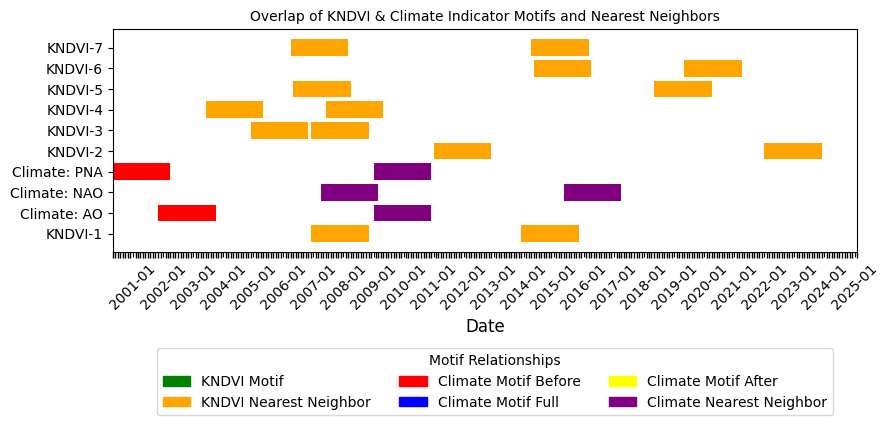

In [140]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import matplotlib.patches as patches

# Set window size for STUMPY matrix profile
window_size = 24
num_nearest_neighbors = 1

# Initialize a list to store results for KNDVI and climate comparisons
plot_data = []

# Function to extract motifs and nearest neighbors from a time series
def extract_motif_and_nearest_neighbors(series, profile, dates, num_neighbors=2):
    motif_idx = np.argmin(profile[:, 0])

    # Get indices of the nearest neighbors sorted by distance
    sorted_indices = np.argsort(profile[:, 0])[:num_nearest_neighbors + 1]  # +1 to include the motif itself

    nearest_neighbor_periods = []
    nearest_neighbor_indices = []

    for idx in sorted_indices:
        if profile[idx, 0] == 0:  # Exclude zero distance
            continue
        nearest_neighbor_idx = int(profile[idx, 1])

        # Ensure nearest neighbor is valid and within the time series bounds
        if nearest_neighbor_idx + window_size <= len(series):
            nearest_neighbor_period = (pd.Timestamp(dates[nearest_neighbor_idx]), pd.Timestamp(dates[nearest_neighbor_idx + window_size - 1]))
            nearest_neighbor_periods.append(nearest_neighbor_period)
            nearest_neighbor_indices.append(nearest_neighbor_idx)

    if nearest_neighbor_periods:
        motif_period = (pd.Timestamp(dates[motif_idx]), pd.Timestamp(dates[motif_idx + window_size - 1]))
        return motif_period, nearest_neighbor_periods, motif_idx, nearest_neighbor_indices
    else:
        return None, None, None, None

# Function to categorize climate motifs (before, full, after)
def categorize_climate_motif(kndvi_motif_start, climate_motif_start):
    if climate_motif_start < kndvi_motif_start:
        return 'Climate Motif Before'
    elif climate_motif_start == kndvi_motif_start:
        return 'Climate Motif Full'
    else:
        return 'Climate Motif After'

# Limit the number of pixels to 10
selected_pixels = ndvi_pivot_filled.index[:10]  # Select the first 10 pixels

# Loop through only the first 10 pixels in the KNDVI dataset
kndvi_codes = {}
for pixel_index, (lat, lon) in enumerate(selected_pixels):  # Select first 10 pixels
    kndvi_code = f"KNDVI-{pixel_index+1}"
    kndvi_codes[(lat, lon)] = kndvi_code  # Store for later labeling

    kndvi_series = ndvi_pivot_filled.loc[(lat, lon)].values
    dates = ndvi_pivot_filled.columns

    # Compute matrix profile for the KNDVI pixel
    kndvi_mp = stumpy.stump(kndvi_series, m=window_size)

    # Extract 1 motif and 2 nearest neighbors for KNDVI
    kndvi_motif_period, kndvi_nearest_neighbor_periods, kndvi_motif_idx, kndvi_nearest_neighbor_indices = extract_motif_and_nearest_neighbors(kndvi_series, kndvi_mp, dates, num_nearest_neighbors)

    # Skip if motif or nearest neighbor has zero distance or no valid motif was found
    if kndvi_motif_period is None:
        continue

    # Add KNDVI motifs and nearest neighbors to the plot
    plot_data.append({
        'Task': kndvi_code,
        'Latitude': lat,
        'Longitude': lon,
        'Start': kndvi_motif_period[0],
        'Finish': kndvi_motif_period[1],
        'Color': 'green'  # KNDVI motif
    })

    for i in range(len(kndvi_nearest_neighbor_periods)):
        # Ensure nearest neighbor has valid length and is within bounds
        plot_data.append({
            'Task': kndvi_code,
            'Latitude': lat,
            'Longitude': lon,
            'Start': kndvi_nearest_neighbor_periods[i][0],
            'Finish': kndvi_nearest_neighbor_periods[i][1],
            'Color': 'orange'  # KNDVI nearest neighbor
        })

    # Now compare with each climate indicator
    for feature in ['AO', 'NAO', 'ENSO', 'PNA']:
        climate_series = climate_df[feature].values
        climate_dates = climate_df.index

        # Compute matrix profile for the climate indicator
        climate_mp = stumpy.stump(climate_series, m=window_size)

        # Extract 1 motif and 2 nearest neighbors for the climate series
        climate_motif_period, climate_nearest_neighbor_periods, climate_motif_idx, climate_nearest_neighbor_indices = extract_motif_and_nearest_neighbors(climate_series, climate_mp, climate_dates, num_nearest_neighbors)

        # Skip if motif or nearest neighbor has zero distance or no valid motif was found
        if climate_motif_period is None:
            continue

        # Ensure that both motifs and nearest neighbors for the climate indicators are plotted
        for j in range(len(climate_nearest_neighbor_periods)):
            climate_nearest_neighbor_start = pd.Timestamp(climate_nearest_neighbor_periods[j][0])

            # Retrieve the type of climate motif relationship
            climate_motif_category = categorize_climate_motif(kndvi_motif_period[0], climate_motif_period[0])

            # Add climate motifs
            if climate_motif_category == 'Climate Motif Before':
                color = 'red'
            elif climate_motif_category == 'Climate Motif Full':
                color = 'blue'
            else:
                color = 'yellow'

            plot_data.append({
                'Task': f'Climate: {feature}',
                'Latitude': lat,
                'Longitude': lon,
                'Start': climate_motif_period[0],
                'Finish': climate_motif_period[1],
                'Color': color  # Climate motif (Before, Full, After)
            })

            # Add climate nearest neighbors
            plot_data.append({
                'Task': f'Climate: {feature}',
                'Latitude': lat,
                'Longitude': lon,
                'Start': climate_nearest_neighbor_periods[j][0],
                'Finish': climate_nearest_neighbor_periods[j][1],
                'Color': 'purple'  # Climate nearest neighbor
            })

# Convert results to DataFrame for analysis
plot_data_df = pd.DataFrame(plot_data)

# Function to prepare Gantt chart data
def prepare_gantt_data(plot_data):
    gantt_data = []
    for entry in plot_data:
        gantt_data.append({
            'Task': entry['Task'],
            'Latitude': entry['Latitude'],
            'Longitude': entry['Longitude'],
            'Start': entry['Start'],
            'Finish': entry['Finish'],
            'Color': entry['Color']
        })
    return gantt_data

# Function to plot Gantt chart
def plot_gantt_chart_with_adjusted_labels(gantt_data):
    gantt_data_df = pd.DataFrame(gantt_data)

    # Sort Gantt data by latitude and longitude for better visualization
    gantt_data_df = gantt_data_df.sort_values(by=['Latitude', 'Longitude'])

    tasks = gantt_data_df['Task']
    starts = gantt_data_df['Start']
    finishes = gantt_data_df['Finish']
    colors = gantt_data_df['Color']

    # Increase figure size for better label visibility
    fig, ax = plt.subplots(figsize=(9, 5))

    # Plot the Gantt bars for all tasks on the same line
    for i, task in enumerate(tasks):
        ax.barh(task, left=date2num(starts.iloc[i]), width=(date2num(finishes.iloc[i]) - date2num(starts.iloc[i])),
                height=0.8, align='center', color=colors.iloc[i], edgecolor='None')

    # Format date on x-axis
    ax.xaxis_date()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.tick_params(axis='x', which='minor', length=4, width=1, labelsize=10)
    plt.xticks(rotation=45)

    # Add labels and title
    ax.set_xlabel('Date', fontsize=12)
    ax.set_title("Overlap of KNDVI & Climate Indicator Motifs and Nearest Neighbors", fontsize=10)

    # Add legend for the color coding
    legend_labels = ['KNDVI Motif', 'KNDVI Nearest Neighbor', 'Climate Motif Before', 'Climate Motif Full', 'Climate Motif After', 'Climate Nearest Neighbor']
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in ['green', 'orange', 'red', 'blue', 'yellow', 'purple']]
    ax.legend(handles, legend_labels, title="Motif Relationships", loc="upper left", bbox_to_anchor=(0.05, -0.4), ncol=3)

    plt.tight_layout()
    plt.show()

# Prepare Gantt data and plot
gantt_data = prepare_gantt_data(plot_data)
plot_gantt_chart_with_adjusted_labels(gantt_data)


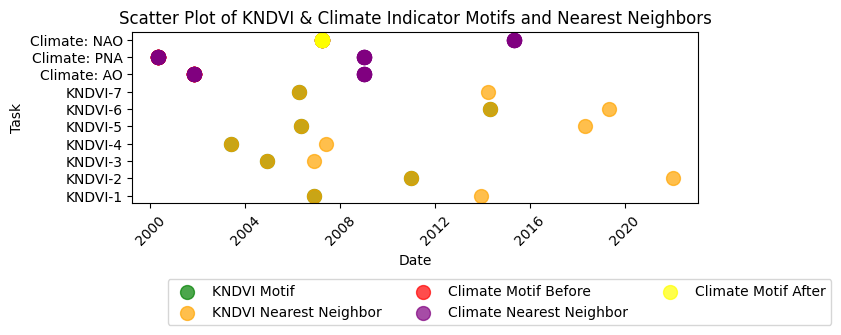

In [141]:
# # This code cannot run without the code directly above it

import matplotlib.pyplot as plt

# Convert the 'Start' and 'Finish' columns to datetime
plot_data_df['Start'] = pd.to_datetime(plot_data_df['Start'])
plot_data_df['Finish'] = pd.to_datetime(plot_data_df['Finish'])

# Define unique colors for the tasks
color_map = {
    'green': 'KNDVI Motif',
    'orange': 'KNDVI Nearest Neighbor',
    'red': 'Climate Motif Before',
    'blue': 'Climate Motif Full',
    'yellow': 'Climate Motif After',
    'purple': 'Climate Nearest Neighbor'
}

# Prepare the figure for plotting
plt.figure(figsize=(8, 4))

# Iterate through the dataframe and plot each task's motifs and nearest neighbors
for color in plot_data_df['Color'].unique():
    subset = plot_data_df[plot_data_df['Color'] == color]
    plt.scatter(subset['Start'], subset['Task'], label=color_map[color], color=color, s=100, alpha=0.7)

# Customize the plot
plt.title("Scatter Plot of KNDVI & Climate Indicator Motifs and Nearest Neighbors")
plt.xlabel("Date")
plt.ylabel("Task")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(0.05, -0.4), ncol=3)

# Display the plot
plt.tight_layout()
plt.show()


Find Where a Pattern Reoccurs Frequently

ii. Identify and Count Frequent Patterns in month & Year


In [143]:
# Consider removing

# With zero exclusion Extended Plot, Table & save

import pandas as pd
from collections import defaultdict
import stumpy
import matplotlib.pyplot as plt

# Step 1: Create a list to store motif occurrences with detailed information
motif_data = []

# Loop through the motif-neighbor pairs and count occurrences by month
for pixel_index, row in ndvi_pivot_filled.iterrows():
    ndvi_series = row.values
    dates = row.index  # Assuming the index of the row contains the dates

    window_size = 24
    mp = stumpy.stump(ndvi_series, m=window_size)

    for motif_idx in range(len(mp)):
        distance_to_nearest_neighbor = mp[motif_idx, 0]  # distance to the nearest neighbor
        nearest_neighbor_idx = mp[motif_idx, 1]  # index of the nearest neighbor

        # Exclude motifs where the distance is exactly zero
        if distance_to_nearest_neighbor > 0:
            motif_time = pd.to_datetime(dates[motif_idx])
            nearest_neighbor_time = pd.to_datetime(dates[nearest_neighbor_idx])

            # Store all relevant information in a dictionary and append to list
            motif_data.append({
                'Year-Month': motif_time.strftime('%Y-%m'),
                'Motif Count': 1,  # Each motif occurrence counts as 1
                'Year': motif_time.year,
                'Month': motif_time.month,
                'Motif index begin month and year': motif_time.strftime('%Y-%m'),
                'Motif end month and year': (motif_time + pd.DateOffset(months=window_size-1)).strftime('%Y-%m'),
                'nearest neighbor begin index': motif_idx,
                'nearest neighbor end index': nearest_neighbor_idx
            })

# Step 2: Convert the motif data to a DataFrame
motif_occurrences_df = pd.DataFrame(motif_data)

# Group by 'Year-Month' to aggregate motif counts
motif_occurrences_summary_df = motif_occurrences_df.groupby('Year-Month').agg(
    {
        'Motif Count': 'sum',
        'Year': 'first',
        'Month': 'first'
    }
).reset_index()

# Calculate the total motifs and add a 'Percentage' column
total_motifs = motif_occurrences_summary_df['Motif Count'].sum()
motif_occurrences_summary_df['Percentage'] = (motif_occurrences_summary_df['Motif Count'] / total_motifs) * 100

# Add the detailed information from the original data
motif_occurrences_summary_df = pd.merge(
    motif_occurrences_summary_df,
    motif_occurrences_df[['Year-Month', 'Motif index begin month and year', 'Motif end month and year',
                          'nearest neighbor begin index', 'nearest neighbor end index']],
    on='Year-Month',
    how='left'
)

# Step 3: Print the table with additional columns
print("Table of Motif Occurrences with Additional Information:")
motif_occurrences_summary_df['Index'] = range(1, len(motif_occurrences_summary_df) + 1)
print(motif_occurrences_summary_df[['Index', 'Year', 'Month', 'Motif Count', 'Percentage',
                                    'Motif index begin month and year', 'Motif end month and year',
                                    'nearest neighbor begin index', 'nearest neighbor end index']])

# # Step 4: Plot the histogram of monthly motif occurrences
# plt.figure(figsize=(12, 5))

# # Set the bar width
# bar_width = 20

# # Create a bar plot (histogram) of motif counts by month
# plt.bar(motif_occurrences_summary_df['Year-Month'], motif_occurrences_summary_df['Motif Count'], color='orange', width=bar_width)

# # Customize the plot
# plt.title('Monthly Number of Motifs and Nearest Neighbors (2000-02 to 2024-04)', fontsize=16)
# plt.xlabel('Year-Month', fontsize=14)
# plt.ylabel('Number of Motifs', fontsize=14)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Customize x-axis to show every 3 months
# three_months = pd.date_range(start='2000-02-01', end='2024-04-01', freq='3MS')  # MS gives the start of the month
# plt.gca().set_xticks(three_months)
# plt.gca().set_xticklabels([date.strftime('%Y-%m') for date in three_months], rotation=45, ha='right')

# # Add gridlines for better visual clarity
# plt.grid(True)

# # Display the plot
# plt.tight_layout()
# plt.show()

# Step 5: Print total number of motifs and nearest neighbors
total_motifs = len(motif_occurrences_df)
total_nearest_neighbors = motif_occurrences_df['nearest neighbor end index'].nunique()
print(f"Total number of motifs: {total_motifs}")
print(f"Total number of nearest neighbors: {total_nearest_neighbors}")

# # Exporting the DataFrame to CSV (uncomment to save)
# motif_occurrences_summary_df.to_csv('/content/drive/My Drive/FoRes/NA_motif_occurrences_summary.csv', index=False)


Table of Motif Occurrences with Additional Information:
         Index  Year  Month  Motif Count  Percentage  \
0            1  2000      2         1277    0.492446   
1            2  2000      2         1277    0.492446   
2            3  2000      2         1277    0.492446   
3            4  2000      2         1277    0.492446   
4            5  2000      2         1277    0.492446   
...        ...   ...    ...          ...         ...   
259313  259314  2022      5         1277    0.492446   
259314  259315  2022      5         1277    0.492446   
259315  259316  2022      5         1277    0.492446   
259316  259317  2022      5         1277    0.492446   
259317  259318  2022      5         1277    0.492446   

       Motif index begin month and year Motif end month and year  \
0                               2000-02                  2002-01   
1                               2000-02                  2002-01   
2                               2000-02                  2002-01   

iii. Identify and Count Frequent Sequence


In [144]:
from collections import Counter

# Initialize a list to collect all motif-neighbor pairs
pattern_list = []

# Loop through each pixel
for index, row in ndvi_pivot_filled.iterrows():
    # Extract the NDVI time series for this pixel
    ndvi_series = row.values

    # Define the window size used previously
    window_size = 24

    # Compute the matrix profile
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Identify the motif index with the lowest matrix profile distance
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]

    # Exclude zero-distance motifs (self-matches)
    if motif_distance > 0:
        neighbor_idx = int(mp[motif_idx, 1])
        neighbor_distance = mp[neighbor_idx, 0]

        # Exclude nearest neighbors with zero distance
        if neighbor_distance > 0 and (neighbor_idx + window_size) <= len(ndvi_series):
            # Extract the motif and neighbor sequences
            motif_sequence = tuple(ndvi_series[motif_idx:motif_idx + window_size])
            neighbor_sequence = tuple(ndvi_series[neighbor_idx:neighbor_idx + window_size])

            # Append both sequences to the pattern list
            pattern_list.append(motif_sequence)
            pattern_list.append(neighbor_sequence)

# Count the frequency of each pattern
pattern_counts = Counter(pattern_list)

# Display the most common patterns
most_common_patterns = pattern_counts.most_common(5)
print("Most common patterns:")
for pattern, count in most_common_patterns:
    print(f"Pattern: {pattern}, Count: {count}")

# # Save result_df to CSV locally
# pattern_counts.to_csv('freqyentPatternAfric.csv', index=False)
# most_common_patterns.to_csv('most_common_patternsAfric.csv', index=False)


Most common patterns:
Pattern: (0.7927500000000001, 0.6895, 0.70002, 0.71054, 0.72106, 0.73158, 0.7421, 0.75262, 0.7631399999999999, 0.77366, 0.78418, 0.7947, 0.7645, 0.70855, 0.720235, 0.73192, 0.7436050000000001, 0.75529, 0.766975, 0.77866, 0.7903450000000001, 0.80203, 0.813715, 0.8254), Count: 1
Pattern: (0.8113, 0.7484500000000001, 0.7550250000000001, 0.7616, 0.768175, 0.77475, 0.781325, 0.7879, 0.794475, 0.80105, 0.807625, 0.8142, 0.7906, 0.7605999999999999, 0.7680699999999999, 0.7755399999999999, 0.78301, 0.79048, 0.7979499999999999, 0.8054199999999999, 0.8128899999999999, 0.82036, 0.82783, 0.8352999999999999), Count: 1
Pattern: (0.7565, 0.763095, 0.76969, 0.776285, 0.78288, 0.7894749999999999, 0.7960699999999999, 0.802665, 0.80926, 0.815855, 0.82245, 0.76925, 0.7379, 0.74908, 0.76026, 0.77144, 0.78262, 0.7938000000000001, 0.80498, 0.81616, 0.82734, 0.83852, 0.8497, 0.7757000000000001), Count: 1
Pattern: (0.78375, 0.787685, 0.79162, 0.7955549999999999, 0.7994899999999999, 0.80342

Summation of the motifs and nearest neighbors for each month

Summation of motifs and nearest neighbors for each month:
April: 131
August: 64
December: 313
February: 76
January: 407
July: 56
June: 136
March: 148
May: 174
November: 48
October: 86
September: 57


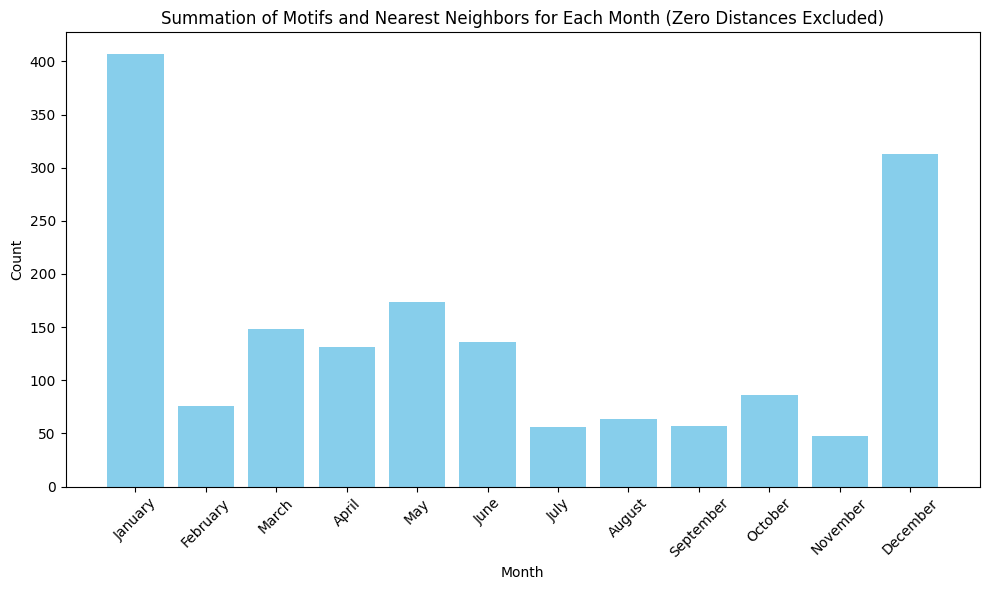

In [145]:
import matplotlib.pyplot as plt
from collections import Counter
import stumpy
import pandas as pd

# Assuming 'ndvi_pivot_filled' has a DateTime index with monthly data

# Counter to store frequency of motifs and nearest neighbors for each month
monthly_motif_count = Counter()

# Set window size for STUMPY matrix profile
window_size = 24

# Loop through all pixels in the dataset
for index, row in ndvi_pivot_filled.iterrows():
    ndvi_series = row.values

    # Compute the matrix profile using STUMPY
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Identify the motif (subsequence with the lowest matrix profile value)
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]

    # Exclude zero-distance motifs
    if motif_distance > 0:
        motif_sequence = tuple(ndvi_series[motif_idx:motif_idx + window_size])

        # Find the date corresponding to the motif and increment the motif count for that month
        motif_date = pd.to_datetime(ndvi_pivot_filled.columns[motif_idx])  # Assuming columns are dates
        motif_month = motif_date.month_name()
        monthly_motif_count[motif_month] += 1

        # Find the nearest neighbor index and exclude it if the distance is zero
        neighbor_idx = int(mp[motif_idx, 1])

        # Ensure the neighbor index is within bounds and exclude zero-distance nearest neighbors
        if neighbor_idx + window_size < len(ndvi_series):
            neighbor_distance = mp[neighbor_idx, 0]

            if neighbor_distance > 0:
                neighbor_date = pd.to_datetime(ndvi_pivot_filled.columns[neighbor_idx])
                neighbor_month = neighbor_date.month_name()
                # Increment the count for the neighbor's month
                monthly_motif_count[neighbor_month] += 1

# Summation of motifs and nearest neighbors for each month
print("Summation of motifs and nearest neighbors for each month:")
for month, count in sorted(monthly_motif_count.items()):
    print(f"{month}: {count}")

# Define the correct month order from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the monthly counts to follow the correct month order
sorted_counts = [monthly_motif_count.get(month, 0) for month in month_order]

# Plotting the summation of motifs and nearest neighbors for each month
plt.figure(figsize=(10, 6))
plt.bar(month_order, sorted_counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Summation of Motifs and Nearest Neighbors for Each Month (Zero Distances Excluded)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


# Section 10: Plot Motif Continent by Year

In [ ]:
# # # Step 1: Mount Google Drive to access files
# # from google.colab import drive
# # drive.mount('/content/drive')

# # Step 2: Import pandas and openpyxl for Excel reading
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns  # Optional, can use matplotlib directly for heatmap

# # Step 3: Provide the path to your Excel file (replace the path with the correct one)
# file_path = '/content/drive/My Drive/FoRes/MatPro/Motif_Count_Yr.xlsx'

# # Step 4: Load the Excel file with multiple sheets
# excel_file = pd.ExcelFile(file_path)

# # Check sheet names
# print("Sheet names:", excel_file.sheet_names)

# # Step 5: Load a specific sheet (by name or by index) into a DataFrame
# df_first_sheet = pd.read_excel(file_path, sheet_name="Motif")
# df_first_sheet.set_index('Year', inplace=True)

Neighbor at index 267 excluded due to zero distance or out-of-bounds.
Neighbor at index 267 excluded due to zero distance or out-of-bounds.
Summation of motifs and nearest neighbors for each month:
April: 264
August: 139
December: 515
February: 296
January: 711
July: 149
June: 235
March: 285
May: 311
November: 168
October: 178
September: 151


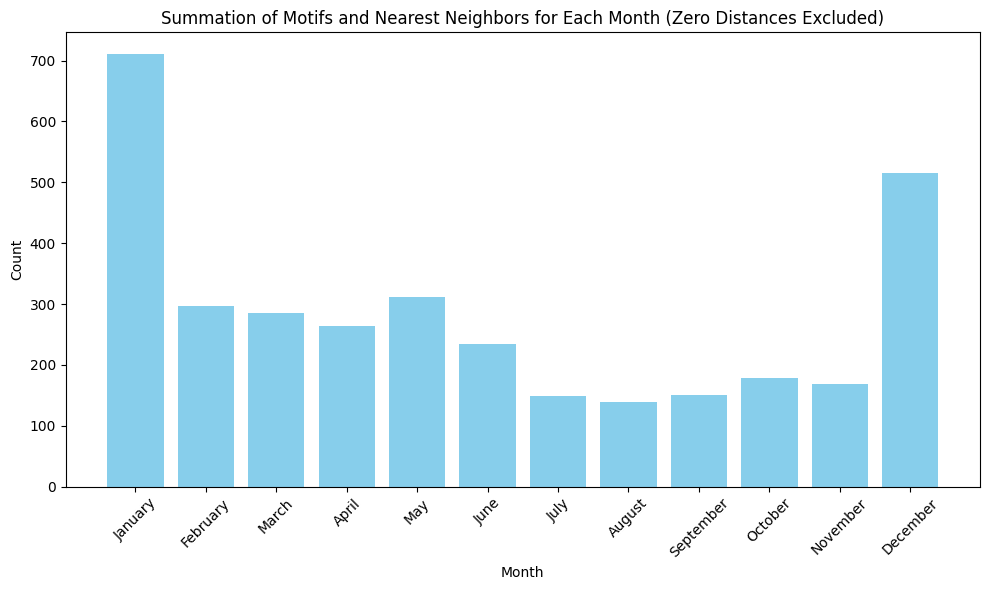

In [146]:
import matplotlib.pyplot as plt
from collections import Counter
import stumpy
import pandas as pd

# Assuming 'ndvi_pivot_filled' has a DateTime index with monthly data

# Counter to store frequency of motifs and nearest neighbors for each month
monthly_motif_count = Counter()

# Set window size for STUMPY matrix profile
window_size = 24

# Define a function to find the nearest neighbors
def find_nearest_neighbors(mp, motif_idx, window_size, ndvi_series, n_neighbors=3):
    """
    Finds the indices of the nearest neighbors for the given motif.
    """
    distances = mp[:, 0]
    sorted_indices = distances.argsort()

    neighbors = []
    for i in range(1, n_neighbors + 1):  # Start from 1 to exclude the motif itself
        neighbor_idx = sorted_indices[i]

        # Exclude zero-distance nearest neighbors and out-of-bounds indices
        if distances[neighbor_idx] > 0 and neighbor_idx + window_size < len(ndvi_series):
            neighbors.append(neighbor_idx)
        else:
            print(f"Neighbor at index {neighbor_idx} excluded due to zero distance or out-of-bounds.")

    return neighbors

# Define the function to plot the motif and its neighbors
def plot_motif_and_neighbors(ndvi_series, motif_idx, neighbors, window_size):
    plt.figure(figsize=(10, 6))

    # Plot the full time series in light gray
    plt.plot(ndvi_series, color='gray', alpha=0.5, label='Full Time Series')

    # Highlight the motif in green
    motif_range = range(motif_idx, motif_idx + window_size)
    plt.plot(motif_range, ndvi_series[motif_range], color='green', linewidth=3, label='Motif')

    # Highlight each nearest neighbor in a different color
    for neighbor_idx in neighbors:
        neighbor_range = range(neighbor_idx, neighbor_idx + window_size)
        plt.plot(neighbor_range, ndvi_series[neighbor_range], linestyle='--', label=f'Neighbor {neighbor_idx}')

    # Adding title, labels, and legend
    plt.title(f'Motif and Nearest Neighbors at Index {motif_idx}')
    plt.xlabel('Time Steps')
    plt.ylabel('KNDVI Value')
    plt.legend()

    # Show the plot
    plt.show()

# Loop through all pixels in the dataset
for index, row in ndvi_pivot_filled.iterrows():
    ndvi_series = row.values

    # Compute the matrix profile using STUMPY
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Identify the motif (subsequence with the lowest matrix profile value)
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]

    # Exclude zero-distance motifs
    if motif_distance > 0:
        motif_sequence = tuple(ndvi_series[motif_idx:motif_idx + window_size])

        # Find the date corresponding to the motif and increment the motif count for that month
        motif_date = pd.to_datetime(ndvi_pivot_filled.columns[motif_idx])  # Assuming columns are dates
        motif_month = motif_date.month_name()
        monthly_motif_count[motif_month] += 1

        # Find nearest neighbors using the defined function
        neighbors = find_nearest_neighbors(mp, motif_idx, window_size, ndvi_series)

        # Plot motif and neighbors (optional, uncomment to see plots)
        #plot_motif_and_neighbors(ndvi_series, motif_idx, neighbors, window_size)
        #print(f"Number of nearest neighbors found: {len(neighbors)}")

        # Increment the count for each neighbor's month
        for neighbor_idx in neighbors:
            neighbor_date = pd.to_datetime(ndvi_pivot_filled.columns[neighbor_idx])
            neighbor_month = neighbor_date.month_name()
            monthly_motif_count[neighbor_month] += 1

# Summation of motifs and nearest neighbors for each month
print("Summation of motifs and nearest neighbors for each month:")
for month, count in sorted(monthly_motif_count.items()):
    print(f"{month}: {count}")

# Define the correct month order from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the monthly counts to follow the correct month order
sorted_counts = [monthly_motif_count.get(month, 0) for month in month_order]

# Plotting the summation of motifs and nearest neighbors for each month
plt.figure(figsize=(10, 6))
plt.bar(month_order, sorted_counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Summation of Motifs and Nearest Neighbors for Each Month (Zero Distances Excluded)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Section 11: Identify the latitude and longitude of the pixels

In [147]:
import pandas as pd
import stumpy

# Assuming ndvi_pivot has the time series data for each pixel
motif_data = []

# Loop through the motif-neighbor pairs and count occurrences by month
for pixel_index, (lat, lon) in enumerate(ndvi_pivot.index):
    ndvi_series = ndvi_pivot.loc[(lat, lon)].values
    dates = ndvi_pivot.columns  # Assuming the columns contain the dates

    window_size = 24  # Adjust as necessary
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Identify motif (minimum matrix profile value)
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]

    # Exclude cases where the distance is exactly zero
    if motif_distance > 0:
        # Get the corresponding month and year for the motif
        motif_time = pd.to_datetime(dates[motif_idx])
        motif_month = motif_time.month
        motif_year = motif_time.year

        # Find the two nearest neighbors (excluding motif itself)
        sorted_indices = mp[:, 0].argsort()
        nearest_neighbors = []
        for idx in sorted_indices:
            if idx != motif_idx and mp[idx, 0] > 0:
                nearest_neighbors.append(idx)
            if len(nearest_neighbors) == 2:
                break

        # Capture discord (maximum matrix profile value)
        discord_idx = mp[:, 0].argmax()
        discord_distance = mp[discord_idx, 0]

        # Store the results if the discord is valid and distinct
        if discord_distance > 0 and discord_idx != motif_idx:
            motif_data.append({
                'latitude': lat,
                'longitude': lon,
                'motif_index': motif_idx,
                'motif_distance': motif_distance,
                'motif_year': motif_year,
                'motif_month': motif_month,
                'nearest_neighbor_1_index': nearest_neighbors[0],
                'nearest_neighbor_1_distance': mp[nearest_neighbors[0], 0],
                'nearest_neighbor_1_year': pd.to_datetime(dates[nearest_neighbors[0]]).year,
                'nearest_neighbor_1_month': pd.to_datetime(dates[nearest_neighbors[0]]).month,
                'nearest_neighbor_2_index': nearest_neighbors[1],
                'nearest_neighbor_2_distance': mp[nearest_neighbors[1], 0],
                'nearest_neighbor_2_year': pd.to_datetime(dates[nearest_neighbors[1]]).year,
                'nearest_neighbor_2_month': pd.to_datetime(dates[nearest_neighbors[1]]).month,
                'discord_index': discord_idx,
                'discord_distance': discord_distance,
                'discord_year': pd.to_datetime(dates[discord_idx]).year,
                'discord_month': pd.to_datetime(dates[discord_idx]).month
            })

# Convert to DataFrame for easier manipulation
motif_df = pd.DataFrame(motif_data)

# Display the DataFrame
print(motif_df.head())

# Save to CSV if needed
# motif_df.to_csv('/content/drive/My Drive/FoRes/Aus_Smotif_df.csv', index=False)


/usr/local/lib/python3.11/dist-packages/stumpy/core.py:2257: RuntimeWarning: divide by zero encountered in divide
  Σ_T_inverse = 1.0 / Σ_T


Empty DataFrame
Columns: []
Index: []


In [149]:
# # With zero exclusion
# # Step 1: Identify Motifs for Each Pixel and Store their Locations

# import pandas as pd
# from collections import defaultdict
# import stumpy

# # Assuming ndvi_pivot has the time series data for each pixel
# motif_locations = []

# # Loop through the motif-neighbor pairs and count occurrences by month
# for pixel_index, (lat, lon) in enumerate(ndvi_pivot.index):
#     ndvi_series = ndvi_pivot.loc[(lat, lon)].values
#     dates = ndvi_pivot.columns  # Assuming the columns contain the dates

#     window_size = 24  # Adjust as necessary
#     mp = stumpy.stump(ndvi_series, m=window_size)

#     # Identify motifs
#     motif_idx = mp[:, 0].argmin()
#     motif_distance = mp[motif_idx, 0]

#     # Exclude cases where the distance is exactly zero
#     if motif_distance > 0:
#         # Get the corresponding month and year for the motif
#         motif_time = pd.to_datetime(dates[motif_idx])
#         motif_month = motif_time.month
#         motif_year = motif_time.year

#         # Store the location (latitude, longitude), month, and year
#         motif_locations.append({
#             'latitude': lat,
#             'longitude': lon,
#             'year': motif_year,
#             'month': motif_month,
#             'motif_index': motif_idx,
#             'motif_distance': motif_distance
#         })

# # Convert to DataFrame for easier manipulation
# motif_df = pd.DataFrame(motif_locations)

# # Display the DataFrame
# print(motif_df.head())


# # Save to GDrive
# # motif_df.to_csv('/content/drive/My Drive/FoRes/Aus_Smotif_df.csv', index=False)


/usr/local/lib/python3.11/dist-packages/stumpy/core.py:2257: RuntimeWarning: divide by zero encountered in divide
  Σ_T_inverse = 1.0 / Σ_T


   latitude  longitude  year  month  motif_index  motif_distance
0     43.06      41.39  2000      2            0             inf
1     43.06      41.45  2000      2            0             inf
2     43.06      41.51  2000      2            0             inf
3     43.08      41.40  2000      2            0             inf
4     43.08      41.46  2000      2            0             inf


In [ ]:
!pip install matplotlib_scalebar
!pip install geopandas shapely matplotlib


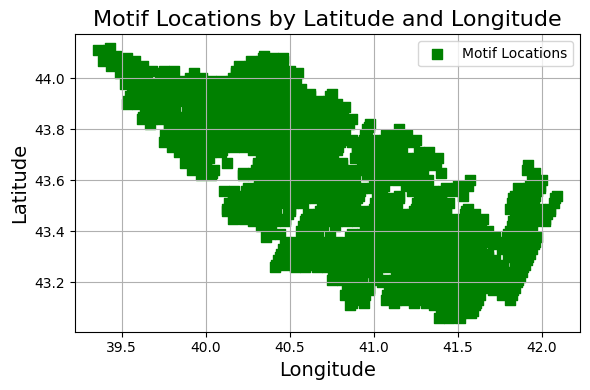

In [155]:
# # Step 3: Visualize Proximity on a Scatter Plot

# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming motif_df is already computed from the previous code
# # If not, you can run the code to generate the DataFrame from the motif detection

# # Generate a scatter plot
# plt.figure(figsize=(6, 4))

# # Scatter plot with square symbols representing the pixels (motif locations)
# plt.scatter(motif_df['longitude'], motif_df['latitude'], s=50, c='green', marker='s', label='Motif Locations')

# # Add plot titles and labels
# plt.title('Motif Locations by Latitude and Longitude', fontsize=16)
# plt.xlabel('Longitude', fontsize=14)
# plt.ylabel('Latitude', fontsize=14)

# # Display legend
# plt.legend(loc='upper right')

# # Show gridlines for better readability
# plt.grid(True)

# # Show the plot
# plt.tight_layout()
# plt.show()



<ipython-input-151-ad6b6f0b3201>:57: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4)


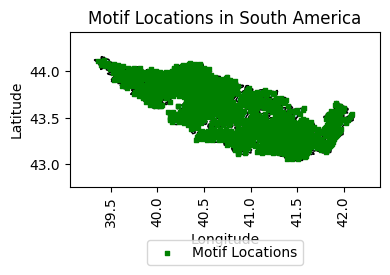

In [151]:
# # # Step 4: Visualize Proximity on a Geographical Map With Shapefile plot

# import geopandas as gpd
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Point
# from google.colab import drive

# # # Step 1: Mount Google Drive
# # drive.mount('/content/drive')

# # Step 2: Load the shapefile from Google Drive
# # Replace 'path_to_shapefile_directory' with the actual path to your shapefile inside your Google Drive
# shapefile_path = '/content/drive/My Drive/Eco2Adapt_Shapes/New_Cont2/Europ.shp'
# custom_shapefile = gpd.read_file(shapefile_path)

# # Assuming motif_df is already created with 'latitude' and 'longitude' columns
# # Create a GeoDataFrame for the motif locations
# geometry = [Point(xy) for xy in zip(motif_df['longitude'], motif_df['latitude'])]
# motif_gdf = gpd.GeoDataFrame(motif_df, geometry=geometry)

# # Load the world shapefile from geopandas datasets (you can remove this if you're only plotting your custom shapefile)
# # world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Step 3: Create a plot
# fig, ax = plt.subplots(figsize=(4, 4))

# # Plot the world map (if desired)
# # world.plot(ax=ax, color='none')


# # Plot the custom shapefile from Google Drive
# custom_shapefile.plot(ax=ax, color='lightblue', edgecolor='black', label='Custom Shapefile')

# # Plot the motif locations on the map
# motif_gdf.plot(ax=ax, color='green', marker='s', markersize=10, label='Motif Locations')

# # Set plot titles and labels
# plt.title('Motif Locations in South America')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Set the x and y limits to zoom in to the region of interest
# min_longitude = motif_df['longitude'].min() - 0.3  # Adjust this value for zoom level
# max_longitude = motif_df['longitude'].max() + 0.3
# min_latitude = motif_df['latitude'].min() - 0.3
# max_latitude = motif_df['latitude'].max() + 0.3

# ax.set_xlim([min_longitude, max_longitude])
# ax.set_ylim([min_latitude, max_latitude])

# # Rotate the longitude labels by 90 degrees
# plt.xticks(rotation=90)

# # Add a legend
# # plt.legend()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4)
# # 0.5, 0.1


# # Show the plot
# plt.tight_layout()
# # plt.grid(True)
# plt.show()


<ipython-input-156-6065298b1212>:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect_white = patches.Rectangle((scalebar_start_x + 0.1, scalebar_start_y), 0.1, scalebar_height, color='white', edgecolor='black', transform=ax.transAxes, clip_on=False)
<ipython-input-156-6065298b1212>:84: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left', bbox_to_anchor=(0.6, -0.3), ncol=4, fontsize=6)


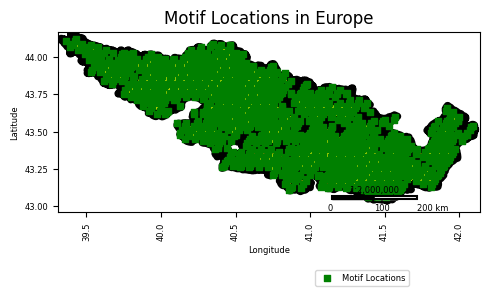

In [156]:
 # Step 4B: Visualize Proximity on a Geographical Map With Shapefile plot

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.patches as patches

# Load the shapefile
shapefile_path = '/content/drive/My Drive/Eco2Adapt_Shapes/New_Cont2/Europ.shp'
custom_shapefile = gpd.read_file(shapefile_path)

# Create a GeoDataFrame for the motif locations
geometry = [Point(xy) for xy in zip(motif_df['longitude'], motif_df['latitude'])]
motif_gdf = gpd.GeoDataFrame(motif_df, geometry=geometry)

# Create a plot
fig, ax = plt.subplots(figsize=(5, 4))

# Plot the custom shapefile with a yellow background and thick black edges
custom_shapefile.plot(ax=ax, color='yellow', edgecolor='black', linewidth=5, label='Custom Shapefile')

# Plot the motif locations on the map as green squares
motif_gdf.plot(ax=ax, color='green', marker='s', markersize=15, label='Motif Locations')

# Set plot titles and labels
plt.title('Motif Locations in Europe')
plt.xlabel('Longitude', fontsize=6)
plt.ylabel('Latitude', fontsize=6)

# Zoom into the region of interest
min_longitude = motif_df['longitude'].min() - 0.05
max_longitude = motif_df['longitude'].max() + 0.05
min_latitude = motif_df['latitude'].min() - 0.1
max_latitude = motif_df['latitude'].max() + 0.05
ax.set_xlim([min_longitude, max_longitude])
ax.set_ylim([min_latitude, max_latitude])

# Rotate the longitude labels by 90 degrees
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=6)


# --- Custom Scalar Bar Creation ---
scalebar_length_km = 200  # Length of the scale bar in kilometers

# Define the start position and height of the scalar bar in axis coordinates (0 to 1 relative to the plot area)
scalebar_start_x = 0.65 # Position to the left
scalebar_start_y = 0.07 # Controls movements (Vital)
scalebar_height = 0.02  # Height of the scalar bar


# ******************
# # Add a scale bar (scalar bar) with representative fraction on top and unit beside it
# scalebar = ScaleBar(dx=1, units='km', dimension='si-length', location='lower right',
#                     scale_loc='top', length_fraction=0.25)

# # Customizing scale bar appearance
# scalebar.label = '1:100,000,000'  # This is the representative fraction
# ax.add_artist(scalebar)

# **************
# Create black and white rectangles for the alternating color effect
rect_black = patches.Rectangle((scalebar_start_x, scalebar_start_y), 0.1, scalebar_height, color='black', transform=ax.transAxes, clip_on=False)
rect_white = patches.Rectangle((scalebar_start_x + 0.1, scalebar_start_y), 0.1, scalebar_height, color='white', edgecolor='black', transform=ax.transAxes, clip_on=False)

# Move the text closer to the scalar bar by reducing the offset from 0.1 to 0.05
ax.text(scalebar_start_x, scalebar_start_y - 0.02, '0', transform=ax.transAxes, ha='right', va='top', fontsize=6)
ax.text(scalebar_start_x + 0.1, scalebar_start_y - 0.02, '100', transform=ax.transAxes, ha='left', va='top', fontsize=6)
ax.text(scalebar_start_x + 0.2, scalebar_start_y - 0.02, '200 km', transform=ax.transAxes, ha='left', va='top', fontsize=6)

# Add a representative fraction above the scalar bar (THE FIRST MOVES THE FIGURES)
ax.text(0.75, scalebar_start_y + 0.03, '1:2,000,000', transform=ax.transAxes, ha='center', va='bottom', fontsize=6)

# Add a bounding box around the scalar bar (covering both black and white parts)
bbox = patches.Rectangle((scalebar_start_x, scalebar_start_y), 0.2, scalebar_height, linewidth=1.5, edgecolor='black', facecolor='none', transform=ax.transAxes, clip_on=False)

# Add the rectangles and bounding box to the plot
ax.add_patch(rect_black)
ax.add_patch(rect_white)
ax.add_patch(bbox)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(0.6, -0.3), ncol=4, fontsize=6)

# Show the plot with tight layout and grid
plt.tight_layout()
# plt.grid(True)

# Show the plot
plt.show()





In [178]:

climate_motifs_df

,feature,motif_start,motif_neighbor_start
0,AO,21,107
1,NAO,86,183
2,ENSO,11,23
3,PNA,3,107
